# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('max_columns', 150)

# Dataset Overview

In [2]:
client_df = pd.read_csv('client_data.csv')
price_df = pd.read_csv('price_data.csv')

In [10]:
print(f'client dataset has {client_df.shape[0]} rows and {client_df.shape[1]} columns')
print(f'price dataset has {price_df.shape[0]} rows and {price_df.shape[1]} columns')

client dataset has 14606 rows and 26 columns
price dataset has 193002 rows and 8 columns


In [5]:
client_df.head(2)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0


In [6]:
price_df.head(2)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0


## Data Info

In [7]:
# Create Data Info After Convert

list_item = []
for col in client_df.columns:
    list_item.append([col, client_df[col].dtype, client_df[col].isna().sum(), 100*client_df[col].isna().sum()/len(client_df[col]), client_df[col].nunique(), client_df[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,id,object,0,0.0,14606,"[24011ae4ebbe3035111d65fa7c15bc57, d29c2c54acc..."
1,channel_sales,object,0,0.0,8,"[foosdfpfkusacimwkcsosbicdxkicaua, MISSING, lm..."
2,cons_12m,int64,0,0.0,11065,"[0, 4660, 544, 1584]"
3,cons_gas_12m,int64,0,0.0,2112,"[54946, 0, 1542867, 80583]"
4,cons_last_month,int64,0,0.0,4751,"[0, 526, 1998, 1260]"
5,date_activ,object,0,0.0,1796,"[2013-06-15, 2009-08-21, 2010-04-16, 2010-03-30]"
6,date_end,object,0,0.0,368,"[2016-06-15, 2016-08-30, 2016-04-16, 2016-03-30]"
7,date_modif_prod,object,0,0.0,2129,"[2015-11-01, 2009-08-21, 2010-04-16, 2010-03-30]"
8,date_renewal,object,0,0.0,386,"[2015-06-23, 2015-08-31, 2015-04-17, 2015-03-31]"
9,forecast_cons_12m,float64,0,0.0,13993,"[0.0, 189.95, 47.96, 240.04]"


In [9]:
# Create Data Info After Convert

list_item = []
for col in price_df.columns:
    list_item.append([col, price_df[col].dtype, price_df[col].isna().sum(), 100*price_df[col].isna().sum()/len(price_df[col]), price_df[col].nunique(), price_df[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,id,object,0,0.0,16096,"[038af19179925da21a25619c5a24b745, 31f2ce54992..."
1,price_date,object,0,0.0,12,"[2015-01-01, 2015-02-01, 2015-03-01, 2015-04-01]"
2,price_off_peak_var,float64,0,0.0,1853,"[0.151367, 0.149626, 0.150321, 0.145859]"
3,price_peak_var,float64,0,0.0,1189,"[0.0, 0.103395, 0.102234, 0.10524]"
4,price_mid_peak_var,float64,0,0.0,711,"[0.0, 0.071536, 0.070375, 0.07515]"
5,price_off_peak_fix,float64,0,0.0,66,"[44.26693116, 44.26692996, 44.44470996, 40.565..."
6,price_peak_fix,float64,0,0.0,31,"[0.0, 24.33958068, 24.43733004, 24.33957804]"
7,price_mid_peak_fix,float64,0,0.0,28,"[0.0, 16.22638872, 16.29155496, 16.22638296]"


# Exploratory Data Analysis

In [11]:
num_client = client_df.select_dtypes(include='number').columns
num_price = price_df.select_dtypes(include='number').columns

In [13]:
print(len(num_client))
print(len(num_price))

18
6


## Univariate Analysis

### Descriptive Statistic Client Dataset

In [24]:
client_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.286252,573465.264198,0.0,5674.750000,14115.500000,40763.750000,6.207104e+06
cons_gas_12m,14606.0,28092.375325,162973.059057,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14606.0,16090.269752,64364.196422,0.0,0.000000,792.500000,3383.000000,7.712030e+05
forecast_cons_12m,14606.0,1868.614880,2387.571531,0.0,494.995000,1112.875000,2401.790000,8.290283e+04
forecast_cons_year,14606.0,1399.762906,3247.786255,0.0,0.000000,314.000000,1745.750000,1.753750e+05
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14606.0,63.086871,66.165783,0.0,16.180000,18.795000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,5.926638e+01


### Descriptive Statistic Price Dataset

In [25]:
price_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price_off_peak_var,193002.0,0.141027,0.025032,0.0,0.125976,0.146033,0.151635,0.280700
price_peak_var,193002.0,0.054630,0.049924,0.0,0.000000,0.085483,0.101673,0.229788
price_mid_peak_var,193002.0,0.030496,0.036298,0.0,0.000000,0.000000,0.072558,0.114102
price_off_peak_fix,193002.0,43.334477,5.410297,0.0,40.728885,44.266930,44.444710,59.444710
price_peak_fix,193002.0,10.622875,12.841895,0.0,0.000000,0.000000,24.339581,36.490692
price_mid_peak_fix,193002.0,6.409984,7.773592,0.0,0.000000,0.000000,16.226389,17.458221


### Boxplot Client Dataset

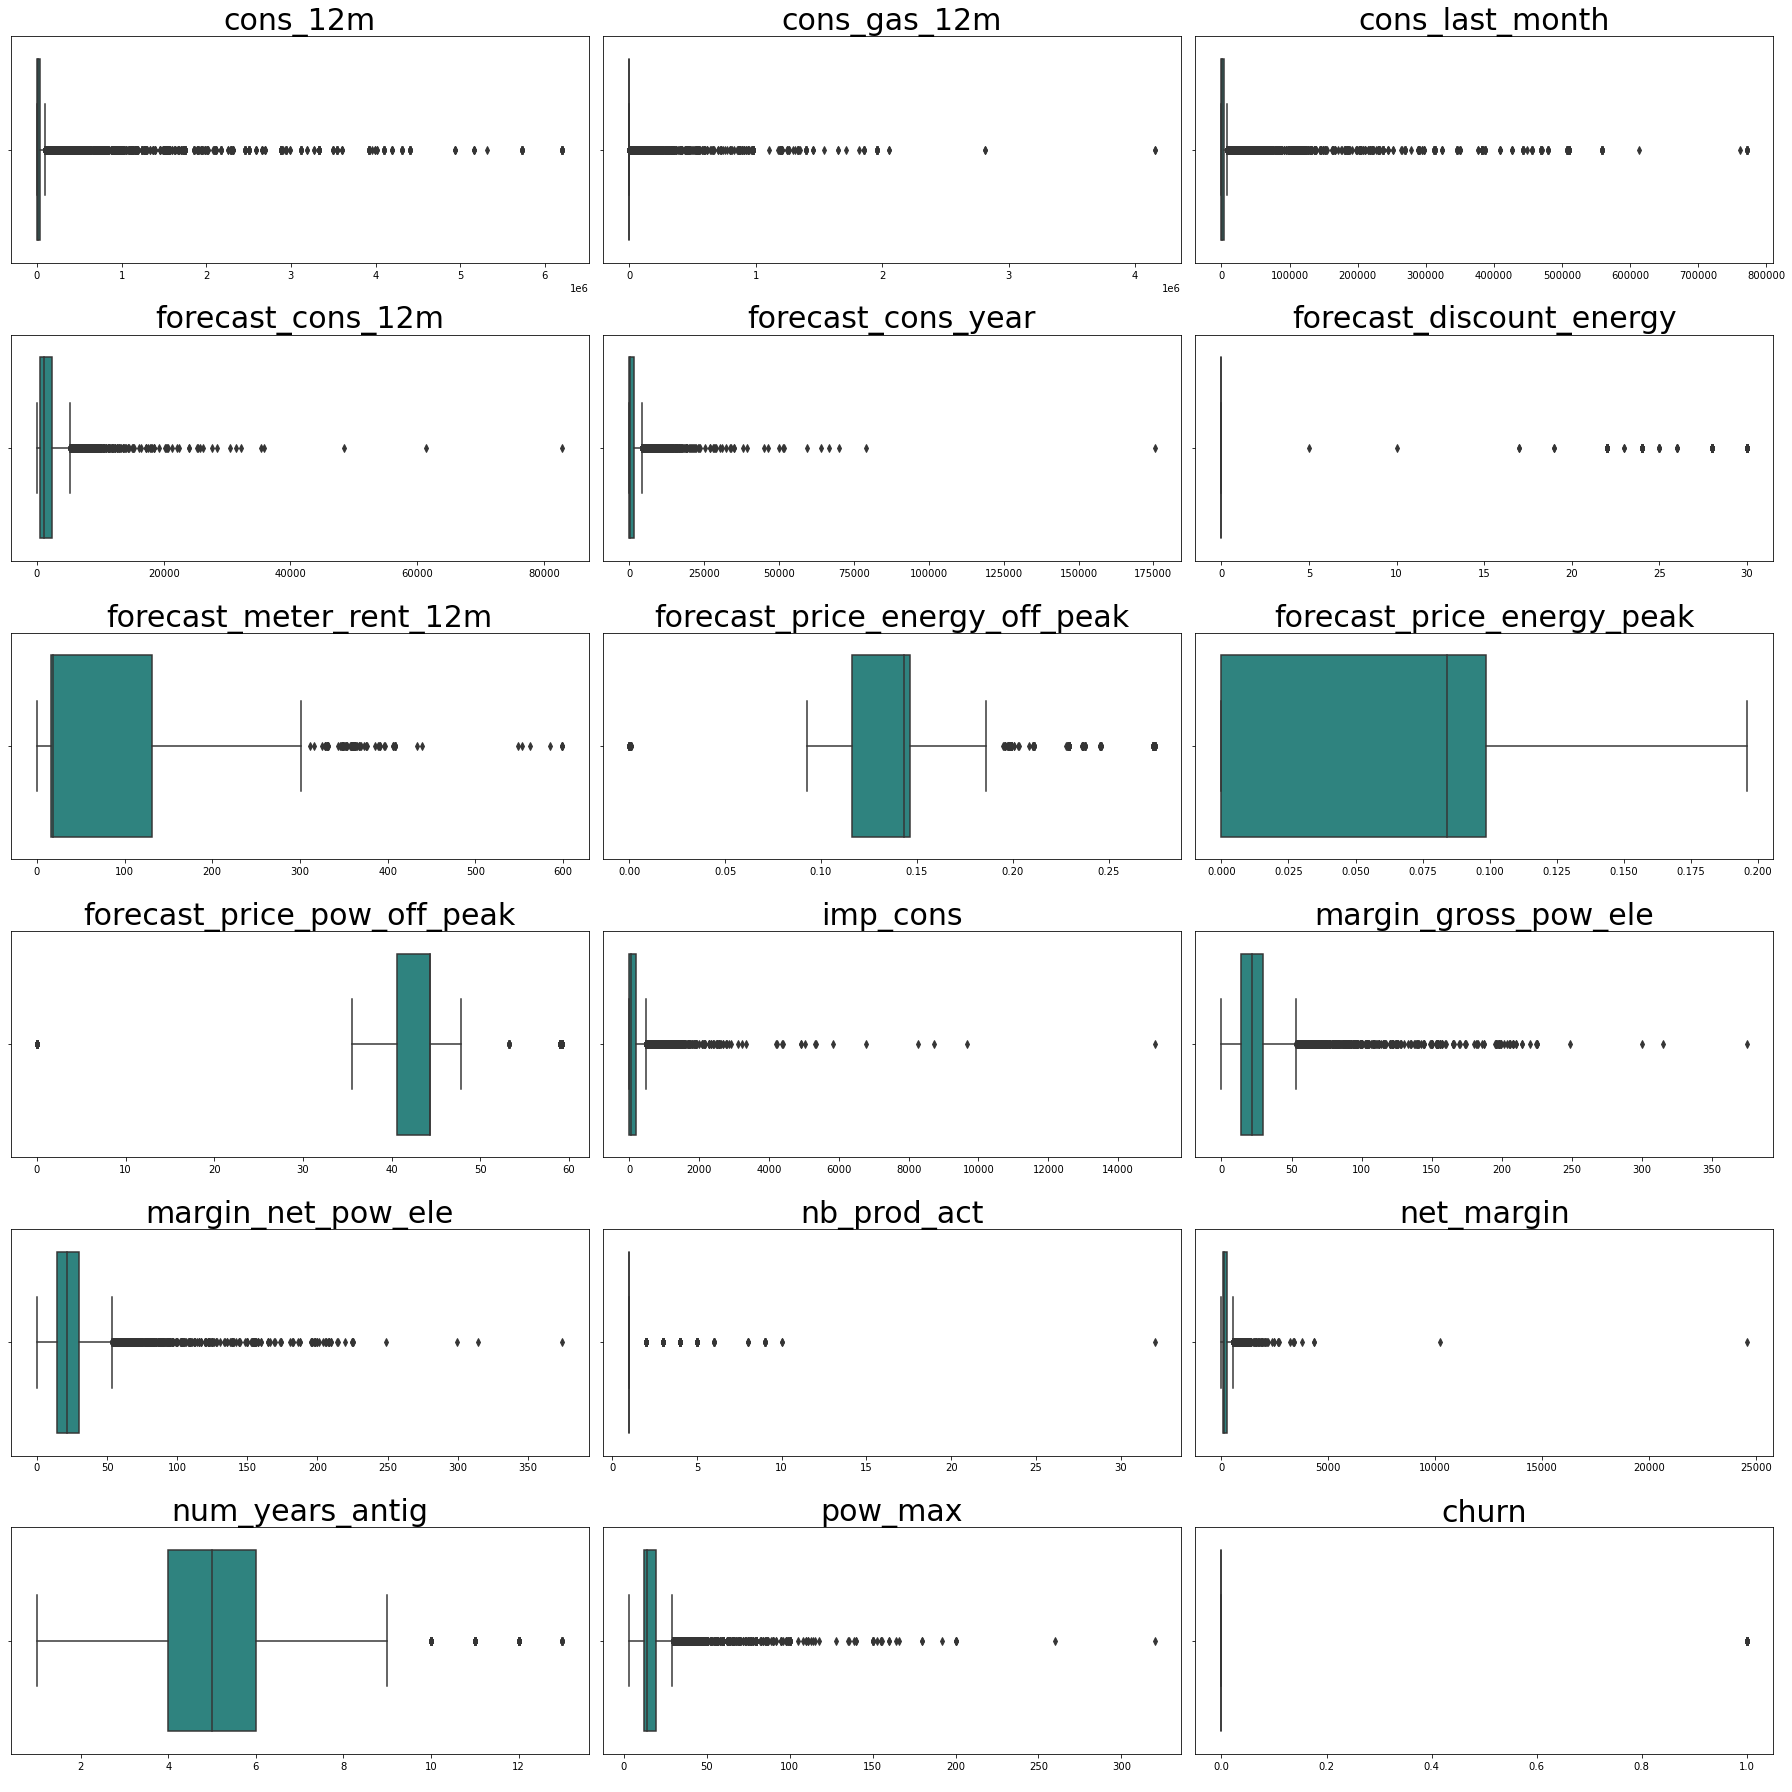

In [18]:
plt.figure(figsize=(25,25))
for i in range(0, len(num_client)):
    plt.subplot(6,3,i+1)
    sns.boxplot(x=client_df[num_client[i]], palette='viridis')
    plt.title(num_client[i], fontsize=30)
    plt.xlabel(' ')
    plt.tight_layout()

### KDE Plot Client Dataset

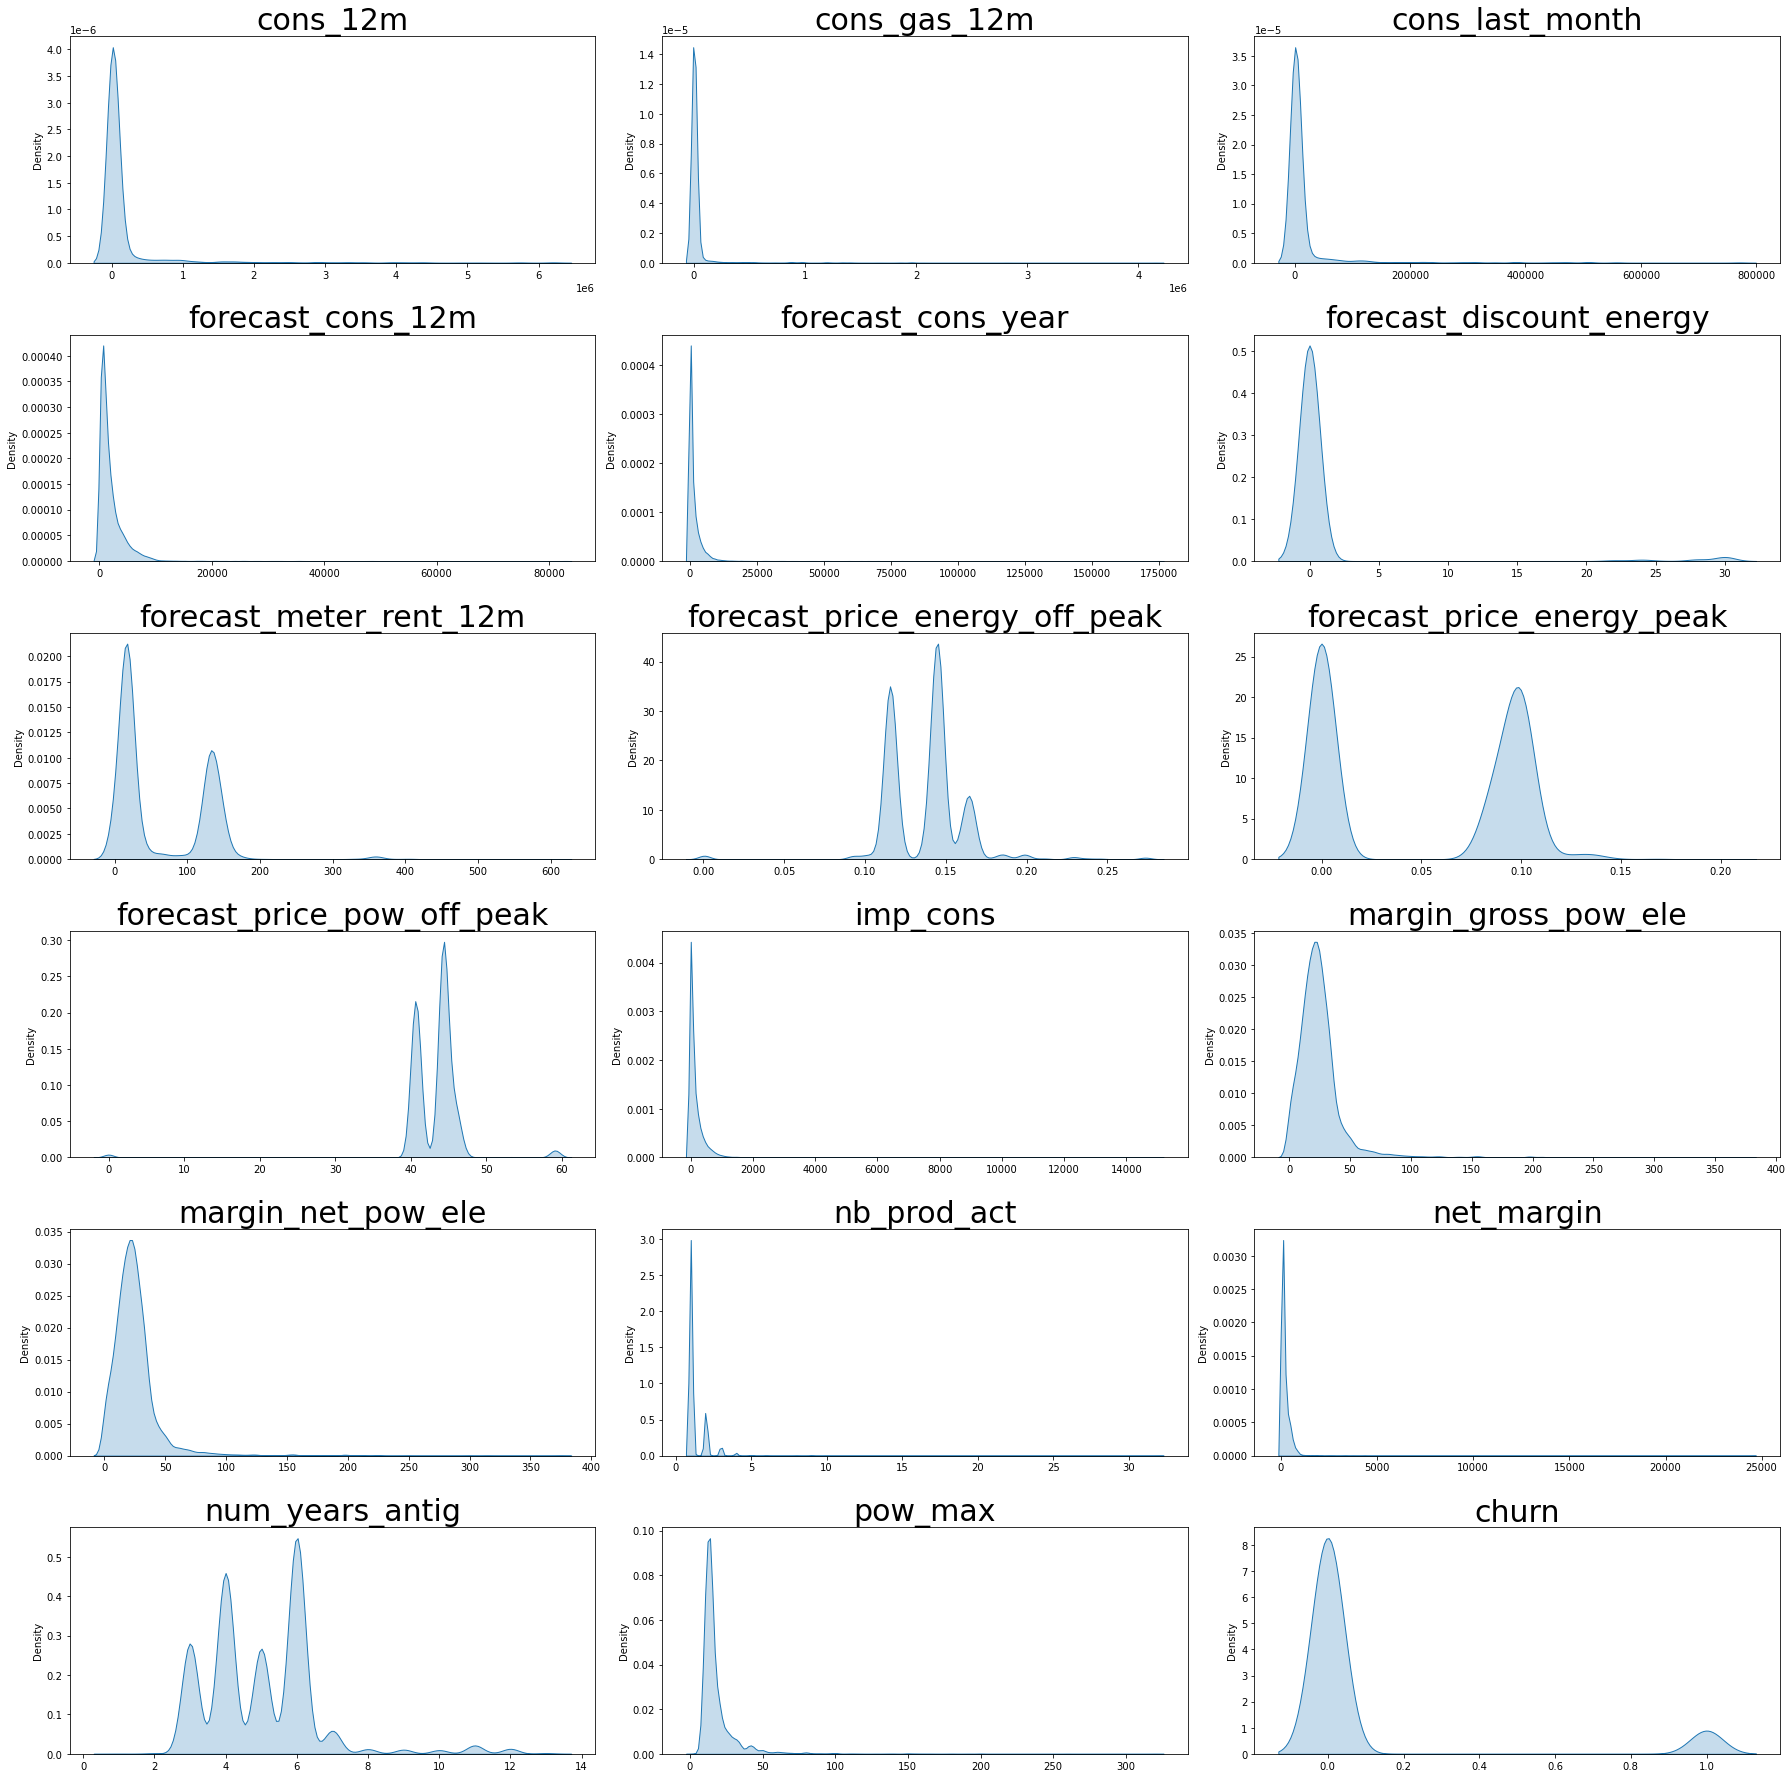

In [26]:
plt.figure(figsize=(25,25))
for i in range(0, len(num_client)):
    plt.subplot(6,3,i+1)
    sns.kdeplot(x=client_df[num_client[i]], palette='viridis', shade=True)
    plt.title(num_client[i], fontsize=30)
    plt.xlabel(' ')
    plt.tight_layout()

### Violinplot Client Dataset

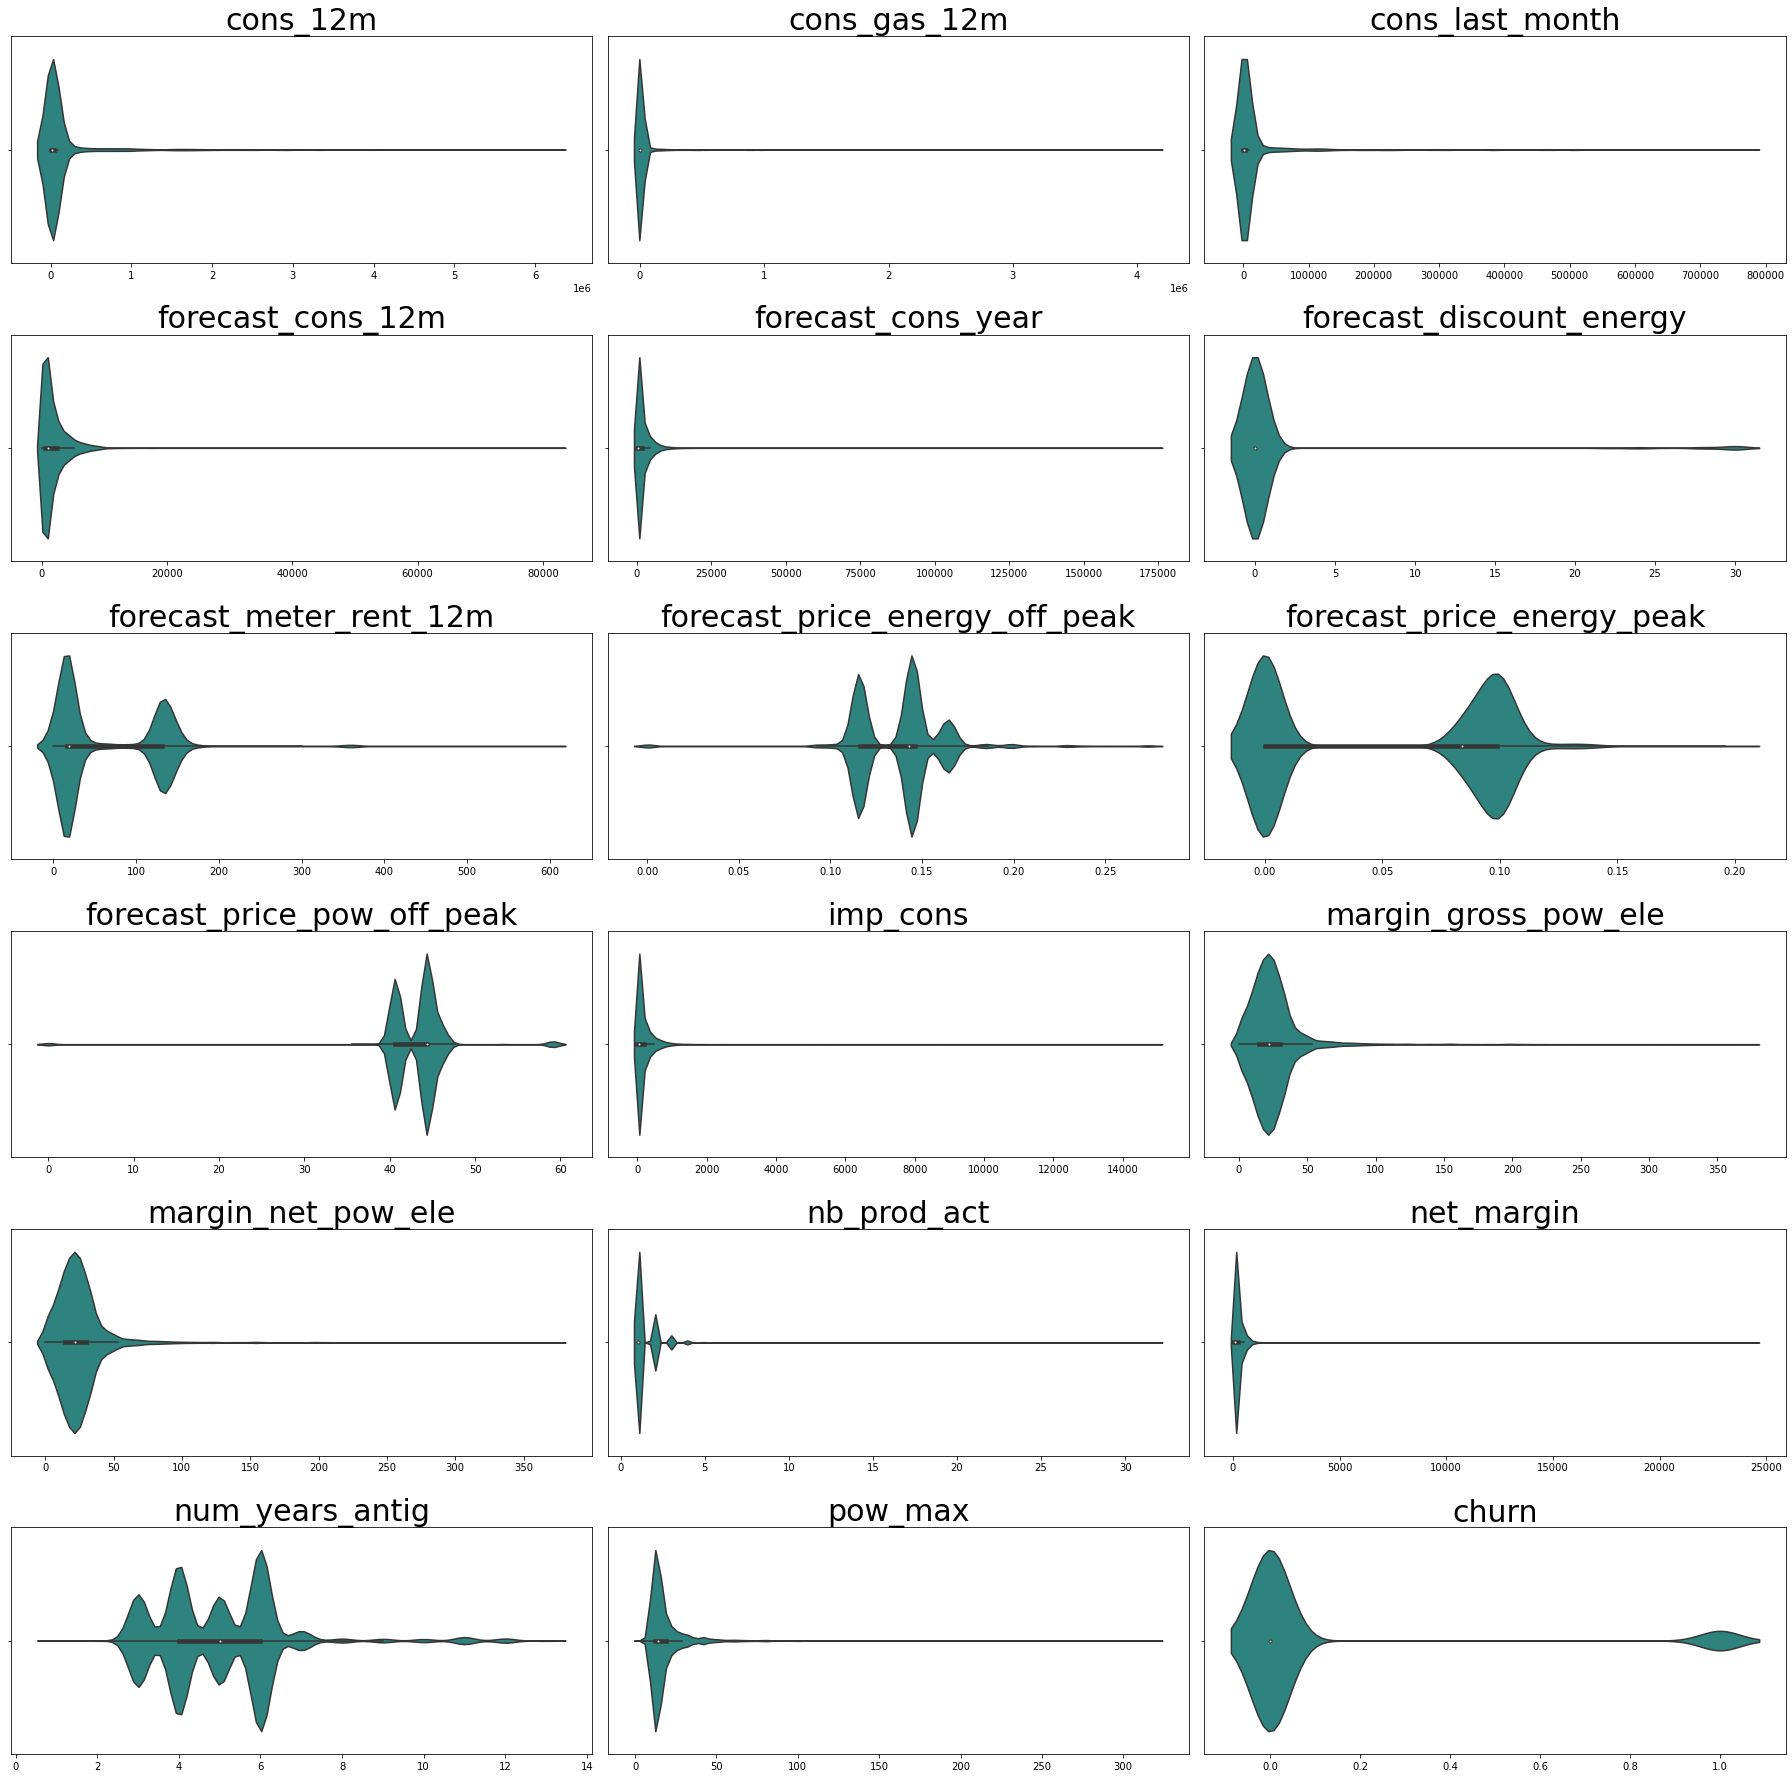

In [27]:
plt.figure(figsize=(25,25))
for i in range(0, len(num_client)):
    plt.subplot(6,3,i+1)
    sns.violinplot(x=client_df[num_client[i]], palette='viridis', shade=True)
    plt.title(num_client[i], fontsize=30)
    plt.xlabel(' ')
    plt.tight_layout()

### Boxplot Price Dataset

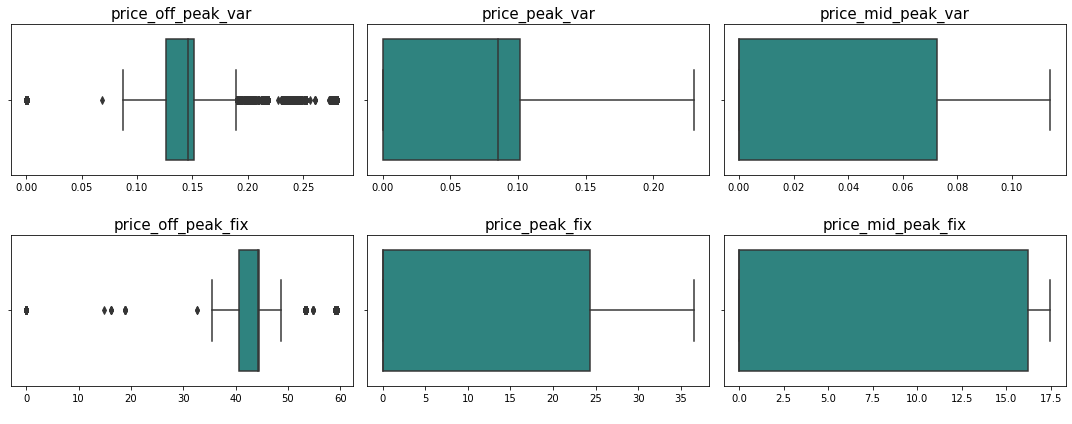

In [21]:
plt.figure(figsize=(15,6))
for i in range(0, len(num_price)):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=price_df[num_price[i]], palette='viridis')
    plt.title(num_price[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

### KDE Plot Price Dataset

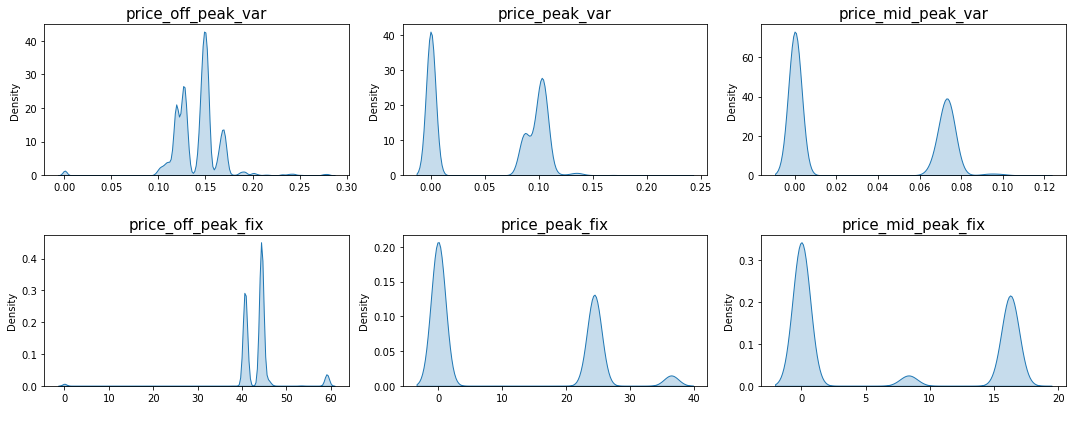

In [28]:
plt.figure(figsize=(15,6))
for i in range(0, len(num_price)):
    plt.subplot(2,3,i+1)
    sns.kdeplot(x=price_df[num_price[i]], palette='viridis', shade=True)
    plt.title(num_price[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

### Violinplot Price Dataset

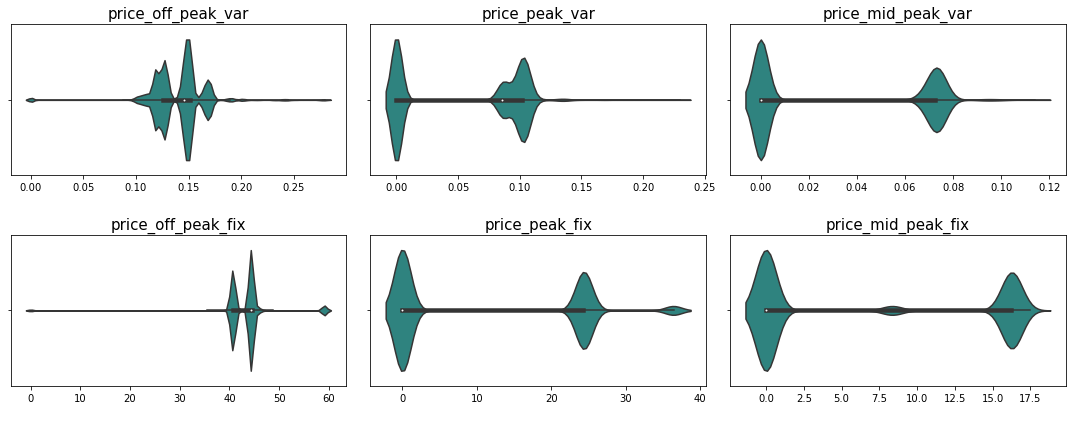

In [29]:
plt.figure(figsize=(15,6))
for i in range(0, len(num_price)):
    plt.subplot(2,3,i+1)
    sns.violinplot(x=price_df[num_price[i]], palette='viridis', shade=True)
    plt.title(num_price[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

## Bivariate Analysis

### Client Dataset

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


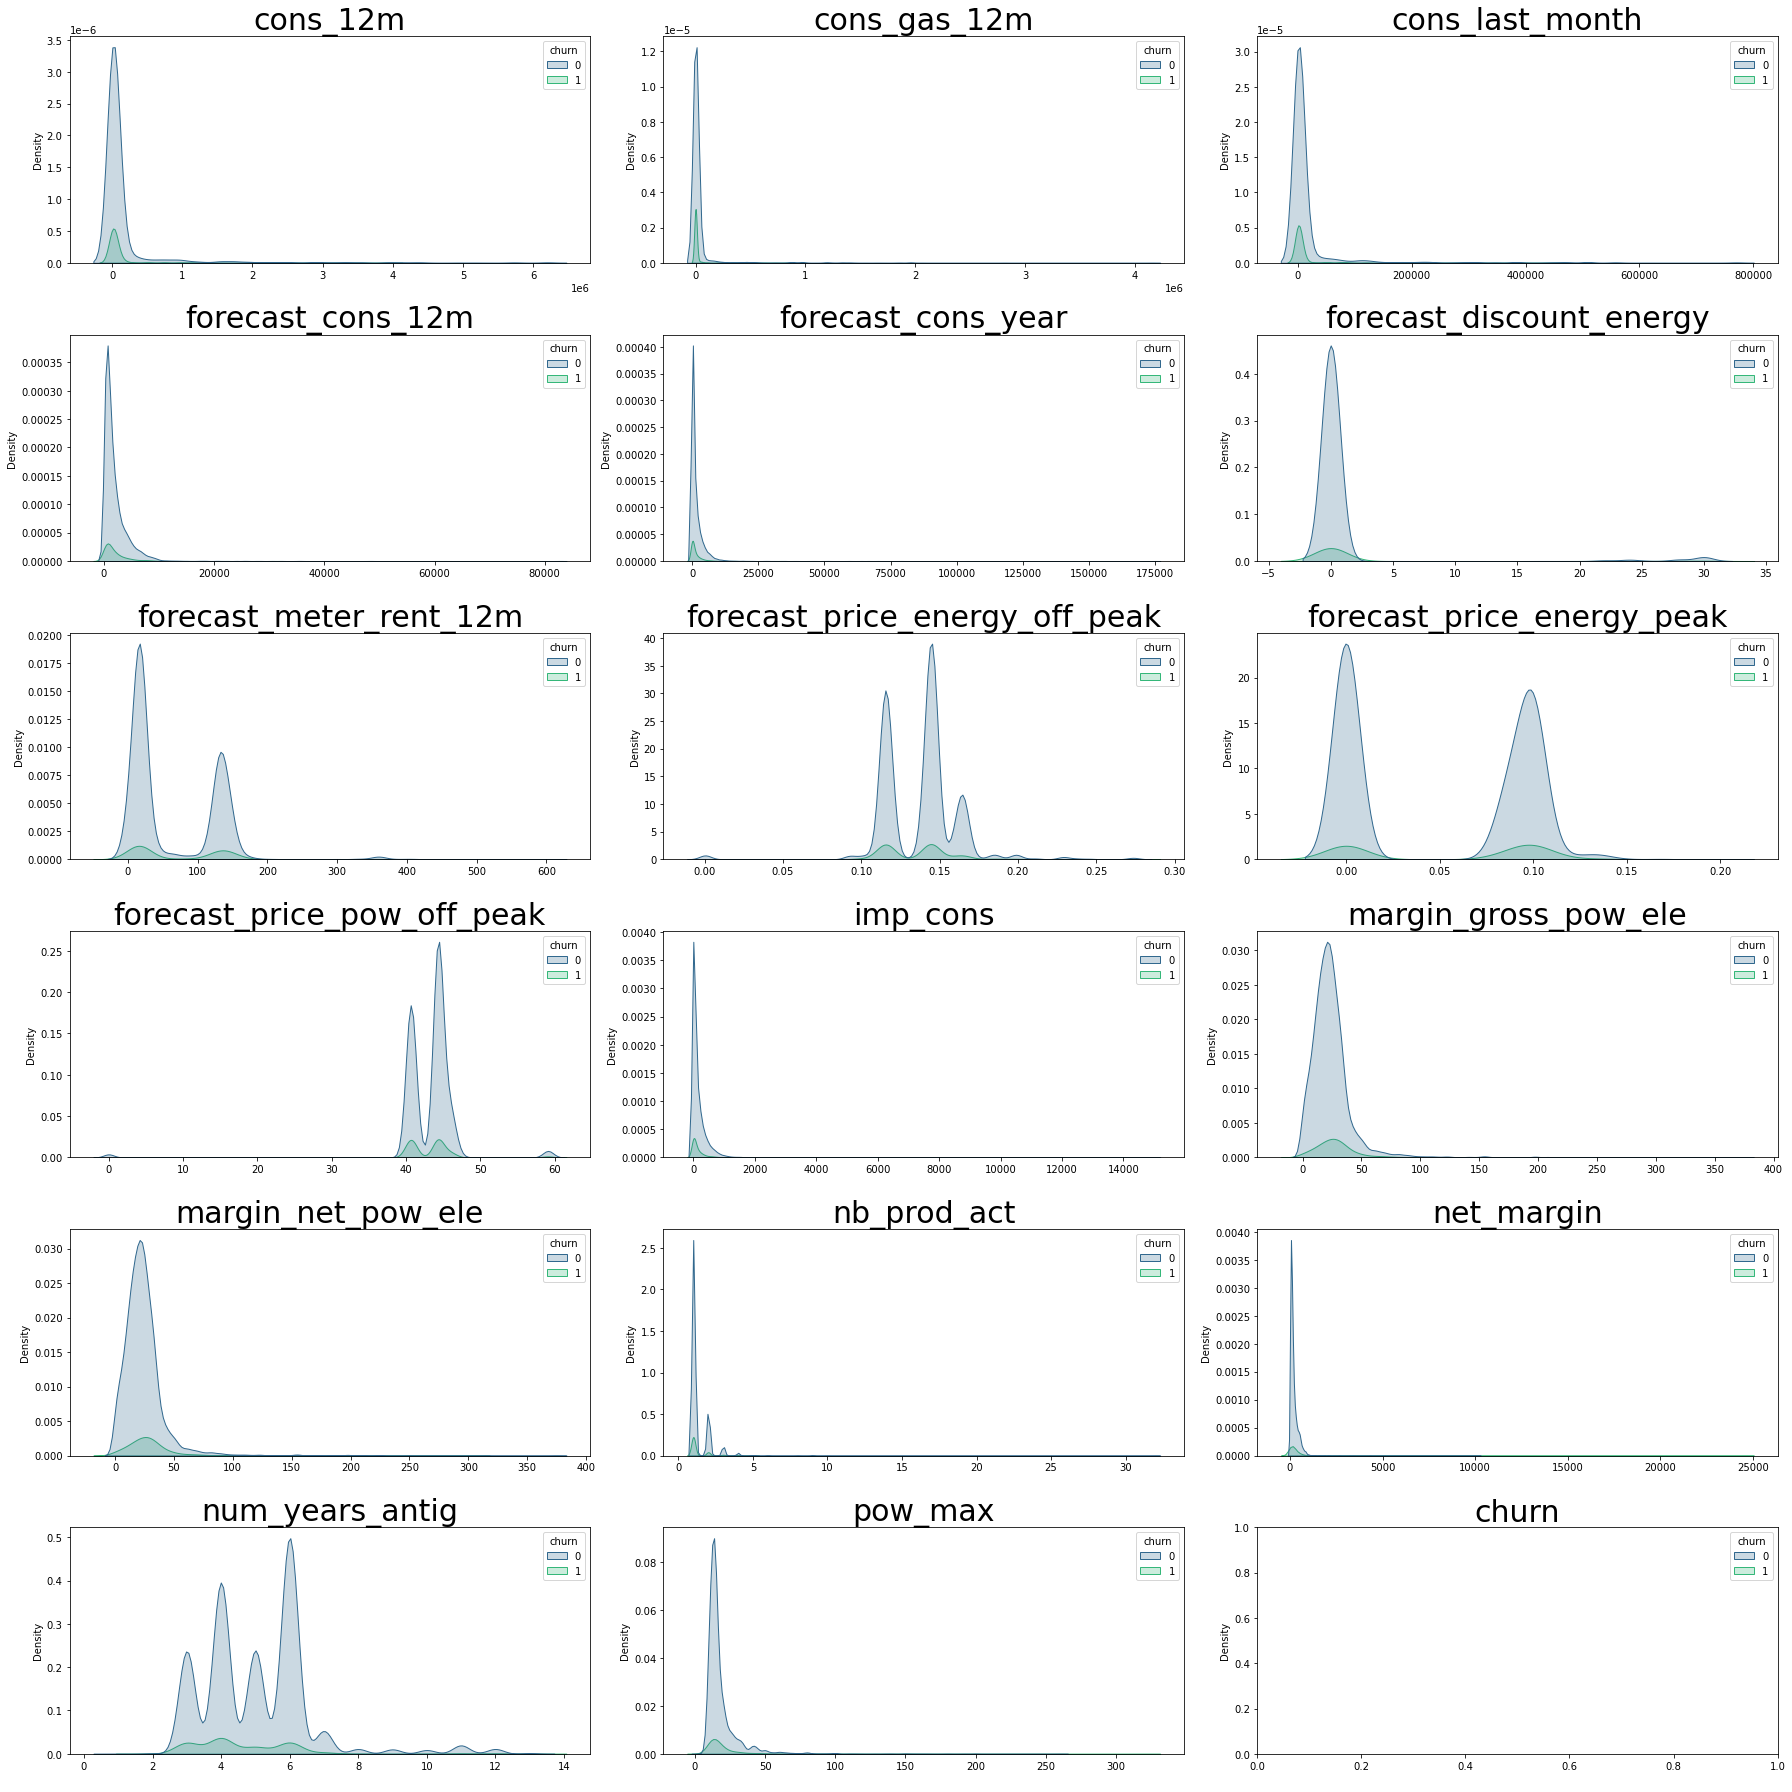

In [30]:
plt.figure(figsize=(25,25))
for i in range(0, len(num_client)):
    plt.subplot(6,3,i+1)
    sns.kdeplot(x=client_df[num_client[i]], palette='viridis', shade=True, hue=client_df['churn'])
    plt.title(num_client[i], fontsize=30)
    plt.xlabel(' ')
    plt.tight_layout()

### Correlation Heatmap Client Dataset

<AxesSubplot:>

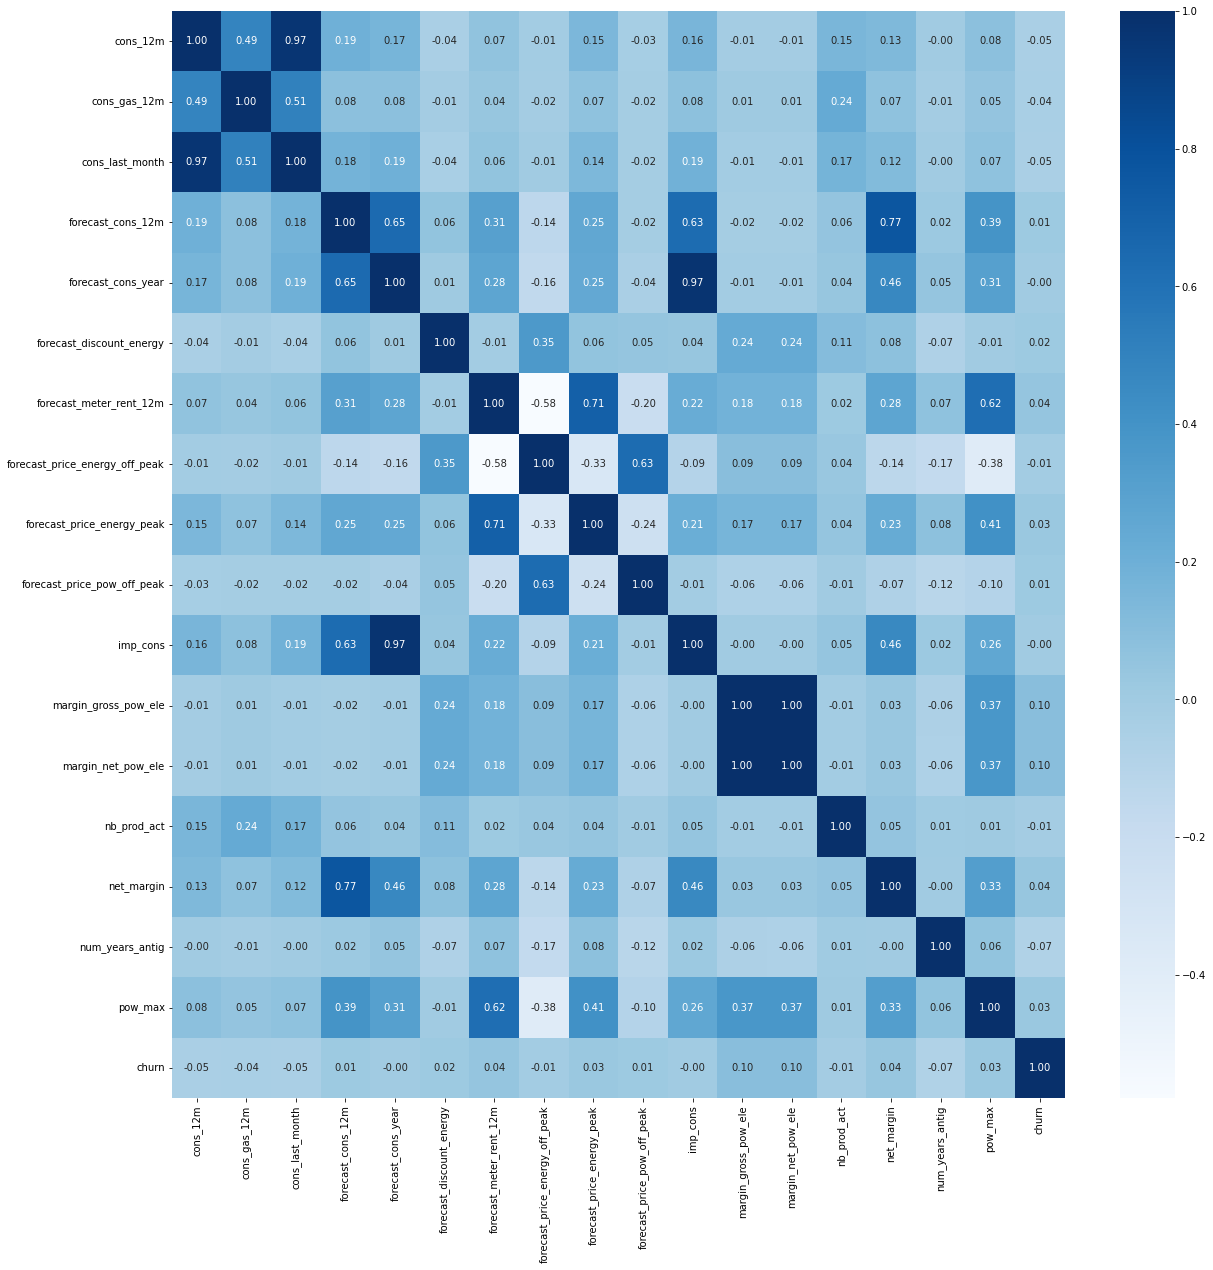

In [33]:
plt.figure(figsize=(20, 20))
sns.heatmap(client_df[num_client].corr(), cmap='Blues', annot=True, fmt='.2f')

## Insights

### `Churn Percentage`

In [53]:
churn_pctg = client_df.groupby('churn')['churn'].count()/len(client_df)*100
churn_pctg

churn
0    90.284814
1     9.715186
Name: churn, dtype: float64

Text(0.5, 1.0, 'Churn Percentage')

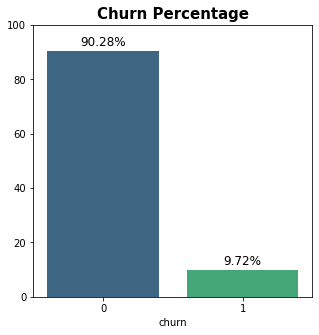

In [60]:
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=churn_pctg.index, y=churn_pctg.values, palette='viridis')

plt.bar_label(ax.containers[0], padding=3, fmt='%.2f%%', fontsize=12)
plt.ylim(0,100)
plt.title('Churn Percentage', fontsize=15, weight='extra bold')

### `Consumption`

In [71]:
consumption = client_df[['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]
cons = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']

In [72]:
consumption['has_gas'] = np.where(consumption['has_gas']=='f',0,1)

/var/folders/v4/0_xjmlhs3g97b1210d3fl8y80000gn/T/ipykernel_11249/1308199333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumption['has_gas'] = np.where(consumption['has_gas']=='f',0,1)


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


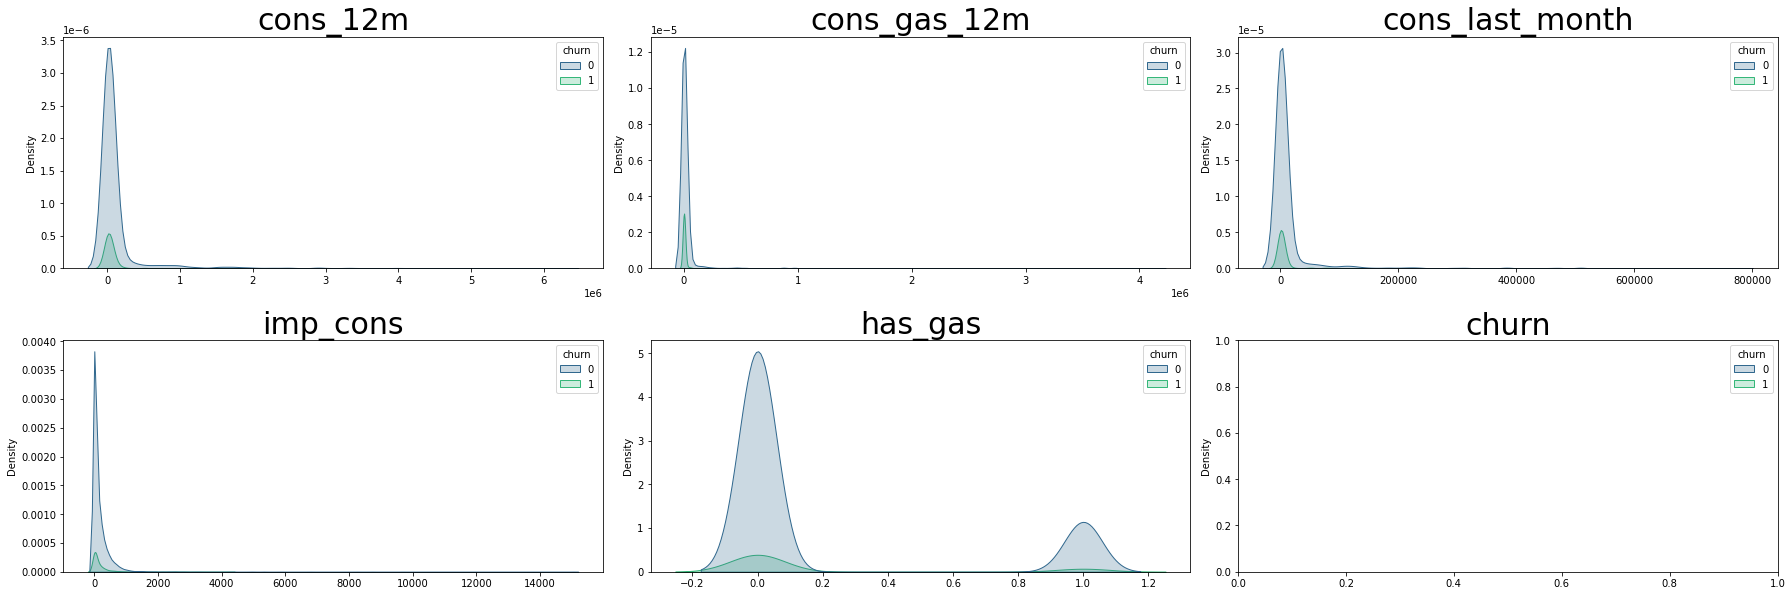

In [73]:
plt.figure(figsize=(25,25))
for i in range(0, len(cons)):
    plt.subplot(6,3,i+1)
    sns.kdeplot(x=consumption[cons[i]], palette='viridis', shade=True, hue=client_df['churn'])
    plt.title(cons[i], fontsize=30)
    plt.xlabel(' ')
    plt.tight_layout()

### `Price Sensitivity`

Since we have the consumption data for each of the companies for the year of 2015, we will create new features to measure "price sensitivity" using the average of the year, the last 6 months and the last 3 months

In [77]:
# Transform date columns to datetime type
client_df["date_activ"] = pd.to_datetime(client_df["date_activ"], format='%Y-%m-%d')
client_df["date_end"] = pd.to_datetime(client_df["date_end"], format='%Y-%m-%d')
client_df["date_modif_prod"] = pd.to_datetime(client_df["date_modif_prod"], format='%Y-%m-%d')
client_df["date_renewal"] = pd.to_datetime(client_df["date_renewal"], format='%Y-%m-%d')
price_df['price_date'] = pd.to_datetime(price_df['price_date'], format='%Y-%m-%d')

In [90]:
# Create mean average data
mean_year = price_df.groupby(['id']).mean().reset_index()
mean_6m = price_df[price_df['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
mean_3m = price_df[price_df['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()

In [92]:
mean_6m.head()

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555
1,0004351ebdd665e6ee664792efc4fd13,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.202024,0.000000,0.000000,45.944710,0.00000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.114428,0.096080,0.069418,40.728885,24.43733,16.291555
4,00114d74e963e47177db89bc70108537,0.146184,0.000000,0.000000,44.266930,0.00000,0.000000


In [94]:
mean_6m["mean_6m_price_p1"] = mean_6m["price_off_peak_var"] + mean_6m["price_off_peak_fix"]
mean_6m["mean_6m_price_p2"] = mean_6m["price_mid_peak_var"] + mean_6m["price_mid_peak_fix"]
mean_6m["mean_6m_price_p3"] = mean_6m["price_peak_var"] + mean_6m["price_peak_fix"]

In [102]:
mean_6m.shape

(16096, 10)

In [95]:
mean_year.head()

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000


In [96]:
mean_6m["mean_6m_price_p1"] = mean_6m["price_off_peak_var"] + mean_6m["price_off_peak_fix"]
mean_6m["mean_6m_price_p2"] = mean_6m["price_mid_peak_var"] + mean_6m["price_mid_peak_fix"]
mean_6m["mean_6m_price_p3"] = mean_6m["price_peak_var"] + mean_6m["price_peak_fix"]

In [103]:
mean_6m.shape

(16096, 10)

In [97]:
mean_3m.head()

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555
1,0004351ebdd665e6ee664792efc4fd13,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555
4,00114d74e963e47177db89bc70108537,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000


In [98]:
mean_3m["mean_3m_price_p1"] = mean_3m["price_off_peak_var"] + mean_3m["price_off_peak_fix"]
mean_3m["mean_3m_price_p2"] = mean_3m["price_mid_peak_var"] + mean_3m["price_mid_peak_fix"]
mean_3m["mean_3m_price_p3"] = mean_3m["price_peak_var"] + mean_3m["price_peak_fix"]

In [104]:
mean_3m.shape

(16095, 10)

In [109]:
# Merge into 1 dataframe
price_features = mean_year.merge(mean_6m, on='id').merge(mean_3m, on='id').merge(client_df[['id', 'churn']], on='id')
price_features.head()

,id,price_off_peak_var_x,price_peak_var_x,price_mid_peak_var_x,price_off_peak_fix_x,price_peak_fix_x,price_mid_peak_fix_x,price_off_peak_var_y,price_peak_var_y,price_mid_peak_var_y,...,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,0.121266,0.102368,0.073728,...,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,16.365274,24.539003,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,0.144687,0.000000,0.000000,...,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,0.202024,0.000000,0.000000,...,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,0.146184,0.000000,0.000000,...,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,0.123007,0.104108,0.075469,...,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,16.367015,24.540743,0


In [110]:
price_features.shape

(14605, 26)

Text(0.5, 1.0, 'Correlation on Target Feature')

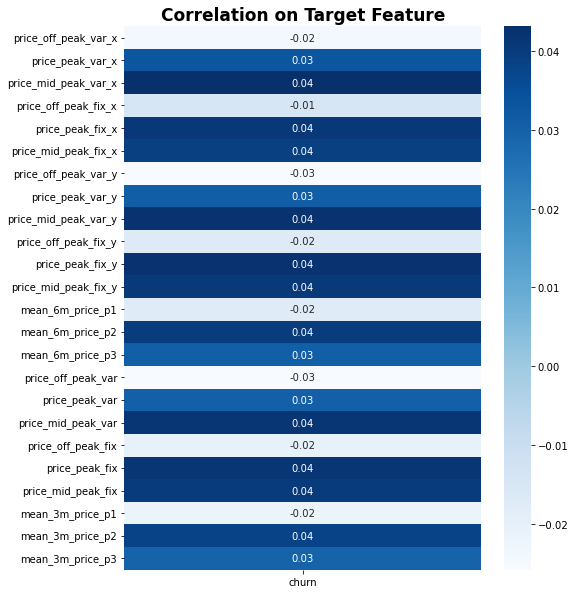

In [114]:
# Create Heatmap Correlation Chart for Each Numerical to Target Features

plt.figure(figsize=(8, 10))
sns.heatmap(price_features.corr(method = 'kendall')[price_features.corr(method = 'kendall').index != 'churn'][['churn']], cmap='Blues', annot=True, fmt='.2f')
plt.title('Correlation on Target Feature', fontsize=17, weight='extra bold')

Insights :
* All price features have low correlation to target (churn)
* Our client have approximately 10% churn customer
* All consumption features are positively skewed
* There are no high correlation among independent features to target feature
* the highest correlation are just 0.10 on margin feature

# Data Preprocessing

## Data Info

In [115]:
df = pd.merge(client_df.drop('churn', axis=1), price_features, on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,8.182687,12.311304,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.000000,0.088409,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,16.365274,24.539003,0


In [116]:
df.shape

(14605, 50)

In [117]:
# Create Data Info After Convert

list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,id,object,0,0.0,14605,"[24011ae4ebbe3035111d65fa7c15bc57, d29c2c54acc..."
1,channel_sales,object,0,0.0,8,"[foosdfpfkusacimwkcsosbicdxkicaua, MISSING, lm..."
2,cons_12m,int64,0,0.0,11064,"[0, 4660, 544, 1584]"
3,cons_gas_12m,int64,0,0.0,2111,"[54946, 0, 1542867, 80583]"
4,cons_last_month,int64,0,0.0,4751,"[0, 526, 1998, 1260]"
5,date_activ,datetime64[ns],0,0.0,1796,"[2013-06-15T00:00:00.000000000, 2009-08-21T00:..."
6,date_end,datetime64[ns],0,0.0,368,"[2016-06-15T00:00:00.000000000, 2016-08-30T00:..."
7,date_modif_prod,datetime64[ns],0,0.0,2129,"[2015-11-01T00:00:00.000000000, 2009-08-21T00:..."
8,date_renewal,datetime64[ns],0,0.0,386,"[2015-06-23T00:00:00.000000000, 2015-08-31T00:..."
9,forecast_cons_12m,float64,0,0.0,13992,"[0.0, 189.95, 47.96, 240.04]"


## Feature Engineering

In [131]:
price_df['price_date'].value_counts().sort_index()

2015-01-01    16070
2015-02-01    16082
2015-03-01    16074
2015-04-01    16079
2015-05-01    16080
2015-06-01    16085
2015-07-01    16090
2015-08-01    16094
2015-09-01    16082
2015-10-01    16085
2015-11-01    16087
2015-12-01    16094
Name: price_date, dtype: int64

### `Price Difference in Jan-Dec`

In [126]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [146]:
diff.shape

(16096, 3)

In [127]:
df = pd.merge(df, diff, on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,price_off_peak_var_x,price_peak_var_x,price_mid_peak_var_x,price_off_peak_fix_x,price_peak_fix_x,price_mid_peak_fix_x,price_off_peak_var_y,price_peak_var_y,price_mid_peak_var_y,price_off_peak_fix_y,price_peak_fix_y,price_mid_peak_fix_y,mean_6m_price_p1,mean_6m_price_p2,mean_6m_price_p3,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,0.123598,0.098104,0.061525,41.318559,20.364442,13.576296,41.442157,13.637821,20.462545,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,8.182687,12.311304,1,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,0.147851,0.014247,0.000000,44.355820,0.000000,0.000000,44.503671,0.000000,0.014247,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,0.168569,0.088535,0.000000,44.444710,0.000000,0.000000,44.613279,0.000000,0.088535,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.000000,0.088409,0,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,0.149330,0.000000,0.000000,44.444710,0.000000,0.000000,44.594040,0.000000,0.000000,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555,40.850151,16.365283,24.539698,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,16.365274,24.539003,0,-0.006192,0.162916


In [145]:
df.shape

(14605, 52)

### `Price Difference Between Peak Periods`

find useful pattern using differece between all periods (same as jan-dec difference, we will find the difference accross the periods)

In [143]:
avg_prices = price_df.groupby('id').agg(price_off_peak_energy=('price_off_peak_var','mean'),
                                        price_mid_peak_energy=('price_mid_peak_var','mean'),
                                        price_peak_energy=('price_peak_var','mean'),
                                        price_off_peak_power=('price_off_peak_fix','mean'),
                                        price_mid_peak_power=('price_mid_peak_fix','mean'),
                                        price_peak_power=('price_peak_fix','mean')).reset_index()

# Calculate the mean difference between consecutive periods
avg_prices['offpeak_peak_avg_price_energy_diff'] = avg_prices['price_off_peak_energy'] - avg_prices['price_peak_energy']
avg_prices['peak_mid_avg_price_energy_diff'] = avg_prices['price_peak_energy'] - avg_prices['price_mid_peak_energy']
avg_prices['off_mid_peak_avg_price_energy_diff'] = avg_prices['price_off_peak_energy'] - avg_prices['price_mid_peak_energy']
avg_prices['offpeak_peak_avg_price_power_diff'] = avg_prices['price_off_peak_power'] - avg_prices['price_peak_power']
avg_prices['peak_mid_avg_price_power_diff'] = avg_prices['price_peak_power'] - avg_prices['price_mid_peak_power']
avg_prices['off_mid_peak_avg_price_power_diff'] = avg_prices['price_off_peak_power'] - avg_prices['price_mid_peak_power']

avg_prices.head()

,id,price_off_peak_energy,price_mid_peak_energy,price_peak_energy,price_off_peak_power,price_mid_peak_power,price_peak_power,offpeak_peak_avg_price_energy_diff,peak_mid_avg_price_energy_diff,off_mid_peak_avg_price_energy_diff,offpeak_peak_avg_price_power_diff,peak_mid_avg_price_power_diff,off_mid_peak_avg_price_power_diff
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.073160,0.103794,40.701732,16.280694,24.421038,0.020545,0.030633,0.051178,16.280694,8.140345,24.421038
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,0.146426,0.000000,0.146426,44.385450,0.000000,44.385450
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,0.181558,0.000000,0.181558,45.319710,0.000000,45.319710
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.069032,0.098292,40.647427,16.258971,24.388455,0.020465,0.029260,0.049725,16.258972,8.129484,24.388456
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,0.147926,0.000000,0.147926,44.266930,0.000000,44.266930


In [144]:
avg_prices.shape

(16096, 13)

In [154]:
# get only difference features and id
col = avg_prices.iloc[:,[0,-6,-5,-4,-3,-2,-1]].columns

# merge
df = pd.merge(df, avg_prices[col], on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,price_off_peak_var_x,price_peak_var_x,price_mid_peak_var_x,price_off_peak_fix_x,price_peak_fix_x,price_mid_peak_fix_x,price_off_peak_var_y,price_peak_var_y,price_mid_peak_var_y,price_off_peak_fix_y,price_peak_fix_y,price_mid_peak_fix_y,mean_6m_price_p1,mean_6m_price_p2,mean_6m_price_p3,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,offpeak_peak_avg_price_energy_diff,peak_mid_avg_price_energy_diff,off_mid_peak_avg_price_energy_diff,offpeak_peak_avg_price_power_diff,peak_mid_avg_price_power_diff,off_mid_peak_avg_price_power_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,0.123598,0.098104,0.061525,41.318559,20.364442,13.576296,41.442157,13.637821,20.462545,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,8.182687,12.311304,1,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,0.147851,0.014247,0.000000,44.355820,0.000000,0.000000,44.503671,0.000000,0.014247,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0,-0.003767,0.177779,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,0.168569,0.088535,0.000000,44.444710,0.000000,0.000000,44.613279,0.000000,0.088535,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.000000,0.088409,0,-0.004670,0.177779,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,0.149330,0.000000,0.000000,44.444710,0.000000,0.000000,44.594040,0.000000,0.000000,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0,-0.004547,0.177779,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555,40.850151,16.365283,24.539698,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,16.365274,24.539003,0,-0.006192,0.162916,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893


In [155]:
df.shape

(14605, 58)

### `Tenure`

In [156]:
df['tenure'] = ((df['date_end'] - df['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)

### `Month`

In [159]:
from datetime import datetime

# create function
def convert_months(reference_date, df, column):
    time_delta = reference_date - df[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months

# Create reference date
reference_date = datetime(2016, 1, 1)

# Create columns
df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = -convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

# drop original features
drop_list = ['date_activ','date_end','date_modif_prod','date_renewal']
df = df.drop(drop_list, axis=1)
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,price_off_peak_var_x,price_peak_var_x,price_mid_peak_var_x,price_off_peak_fix_x,price_peak_fix_x,price_mid_peak_fix_x,price_off_peak_var_y,price_peak_var_y,price_mid_peak_var_y,price_off_peak_fix_y,price_peak_fix_y,price_mid_peak_fix_y,mean_6m_price_p1,mean_6m_price_p2,mean_6m_price_p3,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,offpeak_peak_avg_price_energy_diff,peak_mid_avg_price_energy_diff,off_mid_peak_avg_price_energy_diff,offpeak_peak_avg_price_power_diff,peak_mid_avg_price_power_diff,off_mid_peak_avg_price_power_diff,tenure,months_activ,months_to_end,months_modif_prod,months_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,0.123598,0.098104,0.061525,41.318559,20.364442,13.576296,41.442157,13.637821,20.462545,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,8.182687,12.311304,1,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925,3,30,5,2,6
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,0.147851,0.014247,0.000000,44.355820,0.000000,0.000000,44.503671,0.000000,0.014247,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0,-0.003767,0.177779,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375,7,76,7,76,4
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,0.168569,0.088535,0.000000,44.444710,0.000000,0.000000,44.613279,0.000000,0.088535,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.000000,0.088409,0,-0.004670,0.177779,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450,6,68,3,68,8
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,0.149330,0.000000,0.000000,44.444710,0.000000,0.000000,44.594040,0.000000,0.000000,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0,-0.004547,0.177779,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265,6,69,2,69,9
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555,40.850151,16.365283,24.539698,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,16.365274,24.539003,0,-0.006192,0.162916,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893,6,71,2,71,9


## Feature Encoding

In [178]:
cat = df.select_dtypes(include='object').columns
cat

Index(['id', 'channel_sales', 'origin_up'], dtype='object')

In [165]:
# has_gas
df['has_gas'] = np.where(df['has_gas']=='f',0,1)
df['has_gas'].value_counts()

0    11955
1     2650
Name: has_gas, dtype: int64

In [188]:
# origin_up and channel_sales
categorical_features = pd.get_dummies(df[cat].iloc[:,[1,2]])

# drop original feature
df = df.drop(['channel_sales', 'origin_up'], axis=1)

# concat
df = pd.concat([df, categorical_features], axis=1)
df.shape

(14605, 71)

In [189]:
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,price_off_peak_var_x,price_peak_var_x,price_mid_peak_var_x,price_off_peak_fix_x,price_peak_fix_x,price_mid_peak_fix_x,price_off_peak_var_y,price_peak_var_y,price_mid_peak_var_y,price_off_peak_fix_y,price_peak_fix_y,price_mid_peak_fix_y,mean_6m_price_p1,mean_6m_price_p2,mean_6m_price_p3,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,offpeak_peak_avg_price_energy_diff,peak_mid_avg_price_energy_diff,off_mid_peak_avg_price_energy_diff,offpeak_peak_avg_price_power_diff,peak_mid_avg_price_power_diff,off_mid_peak_avg_price_power_diff,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,channel_sales_MISSING,channel_sales_epumfxlbckeskwekxbiuasklxalciiuu,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf,origin_up_MISSING,origin_up_ewxeelcelemmiwuafmddpobolfuxioce,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,43.648,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,0.123598,0.098104,0.061525,41.318559,20.364442,13.576296,41.442157,13.637821,20.462545,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,8.182687,12.311304,1,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925,3,30,5,2,6,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,13.800,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,0.147851,0.014247,0.000000,44.355820,0.000000,0.000000,44.503671,0.000000,0.014247,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0,-0.003767,0.177779,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375,7,76,7,76,4,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,13.856,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,0.168569,0.088535,0.000000,44.444710,0.000000,0.000000,44.613279,0.000000,0.088535,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.000000,0.088409,0,-0.004670,0.177779,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450,6,68,3,68,8,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,13.200,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,0.149330,0.000000,0.000000,44.444710,0.000000,0.000000,44.594040,0.000000,0.000000,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0,-0.004547,0.177779,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265,6,69,2,69,9,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,44.91,1,47.98,6,19.800,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555,40.850151,16.365283,24.539698,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,16.365274,24.539003,0,-0.006192,0.162916,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893,6,71,2,71,9,1,0,

## Train Test Split

In [197]:
from sklearn.model_selection import train_test_split

# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(df.drop(['churn','id'], axis=1),
                                                    df['churn'],
                                                    test_size=0.3,
                                                    random_state=123)

X_train.shape, X_test.shape

((10223, 69), (4382, 69))

## Handling Imbalaced Target

In [193]:
df['churn'].value_counts(normalize=True)*100

0    90.284149
1     9.715851
Name: churn, dtype: float64

In [198]:
from imblearn.over_sampling import SMOTE

# Random Over Sampling
sm = SMOTE(random_state=0)
sm.fit(X_train, y_train)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

# Modeling

In [12]:
# Import Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, classification_report, f1_score
from sklearn.metrics import confusion_matrix, make_scorer

## Basic Modeling

In [200]:
lr_sm = LogisticRegression()
dt_sm = DecisionTreeClassifier()
rf_sm = RandomForestClassifier()
ab_sm = AdaBoostClassifier()
gb_sm = GradientBoostingClassifier()
xg_sm = XGBClassifier()


# Train the Model
lr_sm.fit(X_smote, y_smote)
dt_sm.fit(X_smote, y_smote)
rf_sm.fit(X_smote, y_smote)
ab_sm.fit(X_smote, y_smote)
gb_sm.fit(X_smote, y_smote)
xg_sm.fit(X_smote, y_smote)

# Predictions for the X test
y_pred_lr_sm = lr_sm.predict(X_test)
y_pred_dt_sm = dt_sm.predict(X_test)
y_pred_rf_sm = rf_sm.predict(X_test)
y_pred_ab_sm = lr_sm.predict(X_test)
y_pred_gb_sm = gb_sm.predict(X_test)
y_pred_xg_sm = xg_sm.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:12:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [203]:
abcd = [['Logistic Regression', accuracy_score(y_test, y_pred_lr_sm), precision_score(y_test, y_pred_lr_sm),
          recall_score(y_test, y_pred_lr_sm), f1_score(y_test, y_pred_lr_sm), fbeta_score(y_test, y_pred_lr_sm, pos_label=0,  beta=2)],
        ['Decision Tree', accuracy_score(y_test, y_pred_dt_sm), precision_score(y_test, y_pred_dt_sm),
          recall_score(y_test, y_pred_dt_sm), f1_score(y_test, y_pred_dt_sm), fbeta_score(y_test, y_pred_dt_sm, pos_label=0, beta=2)],
        ['Random Forest', accuracy_score(y_test, y_pred_rf_sm), precision_score(y_test, y_pred_rf_sm),
          recall_score(y_test, y_pred_rf_sm), f1_score(y_test, y_pred_rf_sm), fbeta_score(y_test, y_pred_rf_sm, pos_label=0, beta=2)],
        ['Ada Boost', accuracy_score(y_test, y_pred_ab_sm), precision_score(y_test, y_pred_ab_sm),
          recall_score(y_test, y_pred_ab_sm), f1_score(y_test, y_pred_ab_sm), fbeta_score(y_test, y_pred_ab_sm, pos_label=0, beta=2)],
        ['Gradient Boost', accuracy_score(y_test, y_pred_gb_sm), precision_score(y_test, y_pred_gb_sm),
          recall_score(y_test, y_pred_gb_sm), f1_score(y_test, y_pred_gb_sm), fbeta_score(y_test, y_pred_gb_sm, pos_label=0, beta=2)],
        ['XG Boost', accuracy_score(y_test, y_pred_xg_sm), precision_score(y_test, y_pred_xg_sm),
          recall_score(y_test, y_pred_xg_sm), f1_score(y_test, y_pred_xg_sm), fbeta_score(y_test, y_pred_gb_sm, pos_label=0, beta=2)]]

df_score = pd.DataFrame(abcd,columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'],dtype=float)
df_score

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)


,Model,Accuracy,Precision,Recall,F1 Score,F2 Score
0,Logistic Regression,0.680739,0.145631,0.433333,0.217999,0.742635
1,Decision Tree,0.813784,0.196013,0.262222,0.224335,0.883740
2,Random Forest,0.897764,0.510417,0.108889,0.179487,0.970571
3,Ada Boost,0.680739,0.145631,0.433333,0.217999,0.742635
4,Gradient Boost,0.881561,0.268456,0.088889,0.133556,0.957617
5,XG Boost,0.903925,0.593548,0.204444,0.304132,0.957617


## Hyperparameter Tuning Random Forest

max_depth: 1; train: 0.7506099765046088; test: 0.751632252242688
max_depth: 2; train: 0.8167503220361568; test: 0.8198216985558627
max_depth: 3; train: 0.8464267612772428; test: 0.8555349029326724
max_depth: 4; train: 0.8685363716038563; test: 0.8728852779349
max_depth: 5; train: 0.8927521717358647; test: 0.8879389781918706
max_depth: 6; train: 0.9404483032816832; test: 0.9320535488759787
max_depth: 7; train: 0.9623435430817205; test: 0.9506830052229811
max_depth: 8; train: 0.9633262806950055; test: 0.949484795174667
max_depth: 9; train: 0.9685791182501708; test: 0.9549151521237075
max_depth: 10; train: 0.9775791449782405; test: 0.961731116008816
max_depth: 11; train: 0.9810390109538146; test: 0.9649078894673608
max_depth: 12; train: 0.9854139487135618; test: 0.9655310420731402
max_depth: 13; train: 0.98871568669436; test: 0.9682499999999999
max_depth: 14; train: 0.992209130126843; test: 0.9671934386877374
max_depth: 15; train: 0.9941099335755285; test: 0.9703692599810122
max_depth: 16

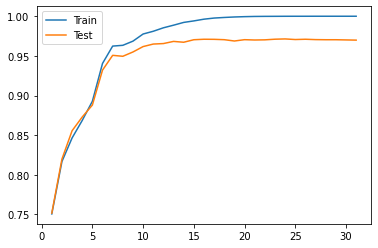

In [204]:
values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion
#values = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model_rf_tunned = RandomForestClassifier(max_depth=x, 
                                             random_state=123)
    model_rf_tunned.fit(X_smote,y_smote)
    
    # eval on train
    y_pred_train_rf = model_rf_tunned.predict(X_train)
    train_rf = fbeta_score(y_train, y_pred_train_rf, pos_label=0, beta=2)
    train_score.append(train_rf)
    
    # eval on test
    y_pred_test_rf = model_rf_tunned.predict(X_test)
    test_rf = fbeta_score(y_test, y_pred_test_rf, pos_label=0, beta=2)
    test_score.append(test_rf)
    
    print('max_depth: ' + str(x) + '; train: ' + str(train_rf) + '; test: ' + str(test_rf))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

`max_depth`: 15; train: 0.9941099335755285; test: 0.9703692599810122

min_samples_split: 2; train: 0.9941099335755285; test: 0.9703692599810122
min_samples_split: 4; train: 0.9922329263844487; test: 0.9685157421289353
min_samples_split: 7; train: 0.9896613724902606; test: 0.970063471437853
min_samples_split: 10; train: 0.9880329094988781; test: 0.9686687987207676
min_samples_split: 13; train: 0.986148461177274; test: 0.9689264125493328
min_samples_split: 16; train: 0.98562409350738; test: 0.969015492253873
min_samples_split: 19; train: 0.9847144349457437; test: 0.9685157421289353
min_samples_split: 22; train: 0.9840538927261874; test: 0.9676129548180726
min_samples_split: 25; train: 0.9836065573770492; test: 0.9675564887022594
min_samples_split: 27; train: 0.9830544601939678; test: 0.9673951092663899
min_samples_split: 30; train: 0.9826829683905598; test: 0.9676048592711092
min_samples_split: 33; train: 0.9819831331459239; test: 0.967104934259861
min_samples_split: 36; train: 0.9814258632074465; test: 0.9667983399169958
min_samples_split: 39; train: 0.98

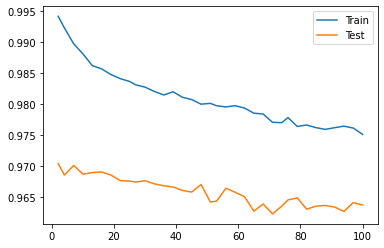

In [205]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion
#values = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model_rf_tunned = RandomForestClassifier(max_depth=15, 
                                             random_state=123,
                                             min_samples_split=x)
    model_rf_tunned.fit(X_smote,y_smote)
    
    # eval on train
    y_pred_train_rf = model_rf_tunned.predict(X_train)
    train_rf = fbeta_score(y_train, y_pred_train_rf, pos_label=0, beta=2)
    train_score.append(train_rf)
    
    # eval on test
    y_pred_test_rf = model_rf_tunned.predict(X_test)
    test_rf = fbeta_score(y_test, y_pred_test_rf, pos_label=0, beta=2)
    test_score.append(test_rf)
    
    print('min_samples_split: ' + str(x) + '; train: ' + str(train_rf) + '; test: ' + str(test_rf))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

`min_samples_split`: 7; train: 0.9896613724902606; test: 0.970063471437853

In [209]:
model_rf_tunned = RandomForestClassifier(max_depth=15, 
                                         random_state=123,
                                         min_samples_split=7)
model_rf_tunned.fit(X_smote,y_smote)
    
# eval on train
y_pred_train_rf = model_rf_tunned.predict(X_train)
train_rf = fbeta_score(y_train, y_pred_train_rf, pos_label=0, beta=2)
   
# eval on test
y_pred_test_rf = model_rf_tunned.predict(X_test)
test_rf = fbeta_score(y_test, y_pred_test_rf, pos_label=0, beta=2)

print('F2 Train RF Score :', train_rf)
print('F2 Test RF Score :', test_rf)

F2 Train RF Score : 0.9896613724902606
F2 Test RF Score : 0.970063471437853


In [210]:
y_train_pred_rf = model_rf_tunned.predict(X_train)
y_test_pred_rf = model_rf_tunned.predict(X_test)

print('TRAINING RESULT:')
print('======================================================')
print('F2 Score:', np.round(fbeta_score(y_train, y_train_pred_rf, pos_label=0, beta=2),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, y_train_pred_rf))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, y_train_pred_rf))

print('\n======================================================')

print('\nTESTING RESULT:')
print('======================================================')
print('F2 Score:', np.round(fbeta_score(y_test, y_test_pred_rf, pos_label=0, beta=2),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred_rf))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred_rf))

TRAINING RESULT:
F2 Score: 0.99
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      9254
           1       0.99      0.53      0.69       969

    accuracy                           0.95     10223
   macro avg       0.97      0.76      0.83     10223
weighted avg       0.96      0.95      0.95     10223

Confussion Matrix ------------------------------------
[[9247    7]
 [ 455  514]]


TESTING RESULT:
F2 Score: 0.97
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3932
           1       0.50      0.11      0.19       450

    accuracy                           0.90      4382
   macro avg       0.71      0.55      0.57      4382
weighted avg       0.87      0.90      0.87      4382

Confussion Matrix ------------------------------------
[[3882   50]
 [ 399   51]]


<AxesSubplot:>

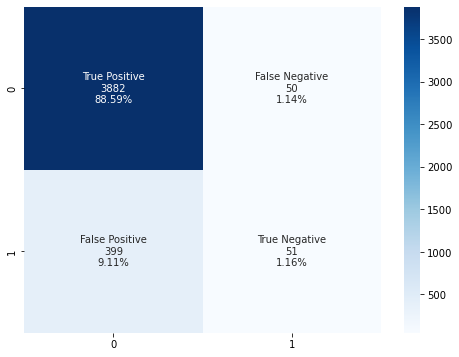

In [211]:
cf_matrix = confusion_matrix(y_test, y_test_pred_rf)

group_names = ["True Positive", "False Negative", "False Positive", "True Negative"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

## Feature Importance

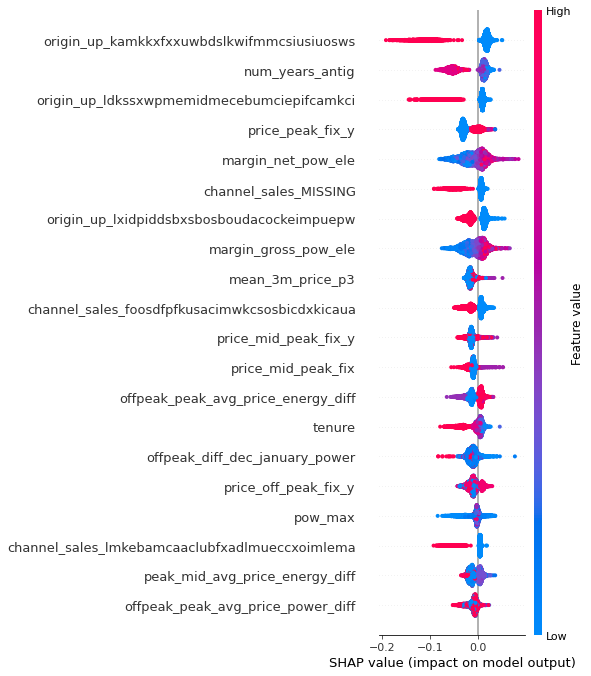

In [212]:
import shap
explainer = shap.TreeExplainer(model_rf_tunned)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)

In [214]:
#df.to_csv('df_cleaned.csv')

## Remodeling

In [7]:
df = pd.read_csv('df_cleaned.csv', index_col=0)
df = df.iloc[:,:-14] # removing encoded categorical features
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,price_off_peak_var_x,price_peak_var_x,price_mid_peak_var_x,price_off_peak_fix_x,price_peak_fix_x,price_mid_peak_fix_x,price_off_peak_var_y,price_peak_var_y,price_mid_peak_var_y,price_off_peak_fix_y,price_peak_fix_y,price_mid_peak_fix_y,mean_6m_price_p1,mean_6m_price_p2,mean_6m_price_p3,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,offpeak_peak_avg_price_energy_diff,peak_mid_avg_price_energy_diff,off_mid_peak_avg_price_energy_diff,offpeak_peak_avg_price_power_diff,peak_mid_avg_price_power_diff,off_mid_peak_avg_price_power_diff,tenure,months_activ,months_to_end,months_modif_prod,months_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,43.648,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,0.123598,0.098104,0.061525,41.318559,20.364442,13.576296,41.442157,13.637821,20.462545,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,8.182687,12.311304,1,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925,3,30,5,2,6
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,13.800,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,0.147851,0.014247,0.000000,44.355820,0.000000,0.000000,44.503671,0.000000,0.014247,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0,-0.003767,0.177779,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375,7,76,7,76,4
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,13.856,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,0.168569,0.088535,0.000000,44.444710,0.000000,0.000000,44.613279,0.000000,0.088535,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.000000,0.088409,0,-0.004670,0.177779,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450,6,68,3,68,8
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,13.200,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,0.149330,0.000000,0.000000,44.444710,0.000000,0.000000,44.594040,0.000000,0.000000,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0,-0.004547,0.177779,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265,6,69,2,69,9
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,44.91,1,47.98,6,19.800,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555,40.850151,16.365283,24.539698,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,16.365274,24.539003,0,-0.006192,0.162916,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893,6,71,2,71,9


In [8]:
df.shape

(14605, 57)

In [9]:
from sklearn.model_selection import train_test_split

# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(df.drop(['churn','id'], axis=1),
                                                    df['churn'],
                                                    test_size=0.3,
                                                    random_state=123)

X_train.shape, X_test.shape

((10223, 55), (4382, 55))

In [11]:
from imblearn.over_sampling import SMOTE

# Random Over Sampling
sm = SMOTE(random_state=0)
sm.fit(X_train, y_train)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

In [13]:
lr_sm = LogisticRegression()
dt_sm = DecisionTreeClassifier()
rf_sm = RandomForestClassifier()
ab_sm = AdaBoostClassifier()
gb_sm = GradientBoostingClassifier()
xg_sm = XGBClassifier()


# Train the Model
lr_sm.fit(X_smote, y_smote)
dt_sm.fit(X_smote, y_smote)
rf_sm.fit(X_smote, y_smote)
ab_sm.fit(X_smote, y_smote)
gb_sm.fit(X_smote, y_smote)
xg_sm.fit(X_smote, y_smote)

# Predictions for the X test
y_pred_lr_sm = lr_sm.predict(X_test)
y_pred_dt_sm = dt_sm.predict(X_test)
y_pred_rf_sm = rf_sm.predict(X_test)
y_pred_ab_sm = lr_sm.predict(X_test)
y_pred_gb_sm = gb_sm.predict(X_test)
y_pred_xg_sm = xg_sm.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:59:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [14]:
abcd = [['Logistic Regression', accuracy_score(y_test, y_pred_lr_sm), precision_score(y_test, y_pred_lr_sm),
          recall_score(y_test, y_pred_lr_sm), f1_score(y_test, y_pred_lr_sm), fbeta_score(y_test, y_pred_lr_sm, pos_label=0,  beta=2)],
        ['Decision Tree', accuracy_score(y_test, y_pred_dt_sm), precision_score(y_test, y_pred_dt_sm),
          recall_score(y_test, y_pred_dt_sm), f1_score(y_test, y_pred_dt_sm), fbeta_score(y_test, y_pred_dt_sm, pos_label=0, beta=2)],
        ['Random Forest', accuracy_score(y_test, y_pred_rf_sm), precision_score(y_test, y_pred_rf_sm),
          recall_score(y_test, y_pred_rf_sm), f1_score(y_test, y_pred_rf_sm), fbeta_score(y_test, y_pred_rf_sm, pos_label=0, beta=2)],
        ['Ada Boost', accuracy_score(y_test, y_pred_ab_sm), precision_score(y_test, y_pred_ab_sm),
          recall_score(y_test, y_pred_ab_sm), f1_score(y_test, y_pred_ab_sm), fbeta_score(y_test, y_pred_ab_sm, pos_label=0, beta=2)],
        ['Gradient Boost', accuracy_score(y_test, y_pred_gb_sm), precision_score(y_test, y_pred_gb_sm),
          recall_score(y_test, y_pred_gb_sm), f1_score(y_test, y_pred_gb_sm), fbeta_score(y_test, y_pred_gb_sm, pos_label=0, beta=2)],
        ['XG Boost', accuracy_score(y_test, y_pred_xg_sm), precision_score(y_test, y_pred_xg_sm),
          recall_score(y_test, y_pred_xg_sm), f1_score(y_test, y_pred_xg_sm), fbeta_score(y_test, y_pred_gb_sm, pos_label=0, beta=2)]]

df_score = pd.DataFrame(abcd,columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'],dtype=float)
df_score

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)


,Model,Accuracy,Precision,Recall,F1 Score,F2 Score
0,Logistic Regression,0.608626,0.132054,0.504444,0.209313,0.663368
1,Decision Tree,0.801917,0.180428,0.262222,0.213768,0.872738
2,Random Forest,0.895025,0.456140,0.115556,0.184397,0.967694
3,Ada Boost,0.608626,0.132054,0.504444,0.209313,0.663368
4,Gradient Boost,0.878138,0.276596,0.115556,0.163009,0.952716
5,XG Boost,0.902556,0.573248,0.200000,0.296540,0.952716


max_depth: 1; train: 0.6637791637791638; test: 0.670189701897019
max_depth: 2; train: 0.7805424792647389; test: 0.7894460212341007
max_depth: 3; train: 0.9264240676580086; test: 0.9303970097989696
max_depth: 4; train: 0.9377213885489791; test: 0.932896064581231
max_depth: 5; train: 0.9470492435606221; test: 0.9400805639476334
max_depth: 6; train: 0.9600230636171438; test: 0.9490554662379421
max_depth: 7; train: 0.9669162347219555; test: 0.952058232931727
max_depth: 8; train: 0.9686953181682387; test: 0.9542693639877516
max_depth: 9; train: 0.9740827645051194; test: 0.9570253735833917
max_depth: 10; train: 0.9808561439413321; test: 0.9640514694838032
max_depth: 11; train: 0.9840317656853744; test: 0.9643018074400439
max_depth: 12; train: 0.9871767471681985; test: 0.9676854584563053
max_depth: 13; train: 0.9895074946466811; test: 0.9668383934377033
max_depth: 14; train: 0.9920405054600847; test: 0.9689437887577517
max_depth: 15; train: 0.9942821521463425; test: 0.9676854584563053
max_dep

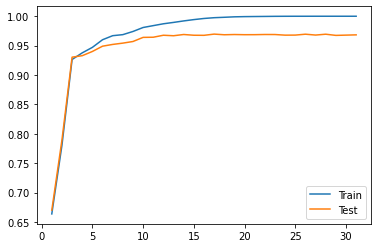

In [15]:
values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion
#values = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model_rf_tunned = RandomForestClassifier(max_depth=x, 
                                             random_state=123)
    model_rf_tunned.fit(X_smote,y_smote)
    
    # eval on train
    y_pred_train_rf = model_rf_tunned.predict(X_train)
    train_rf = fbeta_score(y_train, y_pred_train_rf, pos_label=0, beta=2)
    train_score.append(train_rf)
    
    # eval on test
    y_pred_test_rf = model_rf_tunned.predict(X_test)
    test_rf = fbeta_score(y_test, y_pred_test_rf, pos_label=0, beta=2)
    test_score.append(test_rf)
    
    print('max_depth: ' + str(x) + '; train: ' + str(train_rf) + '; test: ' + str(test_rf))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

`max_depth`: 14; train: 0.9920405054600847; test: 0.9689437887577517

min_samples_split: 2; train: 0.9920405054600847; test: 0.9689437887577517
min_samples_split: 4; train: 0.9907429232648337; test: 0.966878471006154
min_samples_split: 7; train: 0.9884069130732376; test: 0.9678306984190514
min_samples_split: 10; train: 0.9869882915990086; test: 0.9678951842776415
min_samples_split: 13; train: 0.9861680327868854; test: 0.9674434886977394
min_samples_split: 16; train: 0.9851102862750118; test: 0.9667333666833416
min_samples_split: 19; train: 0.9844316485391339; test: 0.9685968596859685
min_samples_split: 22; train: 0.9837935814052671; test: 0.9660228182546036
min_samples_split: 25; train: 0.983608304557275; test: 0.9672336168084043
min_samples_split: 27; train: 0.9830089325686997; test: 0.9655621183301634
min_samples_split: 30; train: 0.9823693691773084; test: 0.9641659576597769
min_samples_split: 33; train: 0.9817546252877484; test: 0.9643590128647946
min_samples_split: 36; train: 0.9814787186427673; test: 0.9637619500475498
min_samples_split: 39; train: 

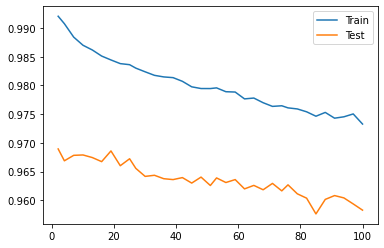

In [16]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion
#values = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model_rf_tunned = RandomForestClassifier(max_depth=14, 
                                             random_state=123,
                                             min_samples_split=x)
    model_rf_tunned.fit(X_smote,y_smote)
    
    # eval on train
    y_pred_train_rf = model_rf_tunned.predict(X_train)
    train_rf = fbeta_score(y_train, y_pred_train_rf, pos_label=0, beta=2)
    train_score.append(train_rf)
    
    # eval on test
    y_pred_test_rf = model_rf_tunned.predict(X_test)
    test_rf = fbeta_score(y_test, y_pred_test_rf, pos_label=0, beta=2)
    test_score.append(test_rf)
    
    print('min_samples_split: ' + str(x) + '; train: ' + str(train_rf) + '; test: ' + str(test_rf))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

`min_samples_split`: 45; train: 0.9797549280767182; test: 0.9630019024732152

min_samples_leaf: 1; train: 0.9797549280767182; test: 0.9630019024732152
min_samples_leaf: 2; train: 0.9799556937758277; test: 0.9650703097632987
min_samples_leaf: 4; train: 0.9785919693258067; test: 0.9638584372027831
min_samples_leaf: 5; train: 0.9779714097019534; test: 0.9647147147147148
min_samples_leaf: 7; train: 0.9770286396181384; test: 0.9627811451184691
min_samples_leaf: 9; train: 0.9758930855145367; test: 0.9623284240056106
min_samples_leaf: 10; train: 0.9755109870201836; test: 0.9616829451540196
min_samples_leaf: 12; train: 0.9764568019601574; test: 0.9634934147929292
min_samples_leaf: 14; train: 0.9747677094876822; test: 0.960623215269776
min_samples_leaf: 15; train: 0.9753446842968868; test: 0.9624436654982474
min_samples_leaf: 17; train: 0.973859832412955; test: 0.9603146765545925
min_samples_leaf: 18; train: 0.9746169092730333; test: 0.959707326851759
min_samples_leaf: 20; train: 0.973421147984739; test: 0.9604788619515126
min_samples_leaf: 22; train: 0.9724146752222387;

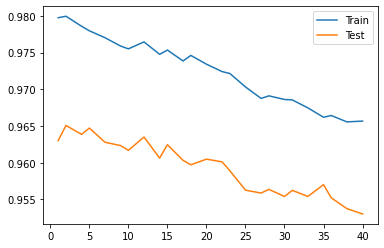

In [17]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion
#values = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model_rf_tunned = RandomForestClassifier(max_depth=14, 
                                             random_state=123,
                                             min_samples_split=45,
                                             min_samples_leaf=x)
    model_rf_tunned.fit(X_smote,y_smote)
    
    # eval on train
    y_pred_train_rf = model_rf_tunned.predict(X_train)
    train_rf = fbeta_score(y_train, y_pred_train_rf, pos_label=0, beta=2)
    train_score.append(train_rf)
    
    # eval on test
    y_pred_test_rf = model_rf_tunned.predict(X_test)
    test_rf = fbeta_score(y_test, y_pred_test_rf, pos_label=0, beta=2)
    test_score.append(test_rf)
    
    print('min_samples_leaf: ' + str(x) + '; train: ' + str(train_rf) + '; test: ' + str(test_rf))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

`min_samples_leaf`: 5; train: 0.9779714097019534; test: 0.9647147147147148

In [18]:
model_rf_tunned = RandomForestClassifier(max_depth=14, 
                                             random_state=123,
                                             min_samples_split=45,
                                             min_samples_leaf=5)
model_rf_tunned.fit(X_smote,y_smote)
    
# eval on train
y_pred_train_rf = model_rf_tunned.predict(X_train)
train_rf = fbeta_score(y_train, y_pred_train_rf, pos_label=0, beta=2)
   
# eval on test
y_pred_test_rf = model_rf_tunned.predict(X_test)
test_rf = fbeta_score(y_test, y_pred_test_rf, pos_label=0, beta=2)

print('F2 Train RF Score :', train_rf)
print('F2 Test RF Score :', test_rf)

F2 Train RF Score : 0.9779714097019534
F2 Test RF Score : 0.9647147147147148


In [19]:
y_train_pred_rf = model_rf_tunned.predict(X_train)
y_test_pred_rf = model_rf_tunned.predict(X_test)

print('TRAINING RESULT:')
print('======================================================')
print('F2 Score:', np.round(fbeta_score(y_train, y_train_pred_rf, pos_label=0, beta=2),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, y_train_pred_rf))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, y_train_pred_rf))

print('\n======================================================')

print('\nTESTING RESULT:')
print('======================================================')
print('F2 Score:', np.round(fbeta_score(y_test, y_test_pred_rf, pos_label=0, beta=2),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred_rf))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred_rf))

TRAINING RESULT:
F2 Score: 0.978
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      9254
           1       0.76      0.23      0.36       969

    accuracy                           0.92     10223
   macro avg       0.84      0.61      0.66     10223
weighted avg       0.91      0.92      0.90     10223

Confussion Matrix ------------------------------------
[[9181   73]
 [ 742  227]]


TESTING RESULT:
F2 Score: 0.965
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      3932
           1       0.41      0.12      0.18       450

    accuracy                           0.89      4382
   macro avg       0.66      0.55      0.56      4382
weighted avg       0.86      0.89      0.86      4382

Confussion Matrix ------------------------------------
[[3855   77]
 [ 397   53]]


<AxesSubplot:>

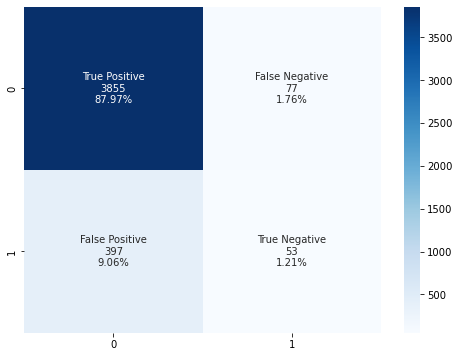

In [20]:
cf_matrix = confusion_matrix(y_test, y_test_pred_rf)

group_names = ["True Positive", "False Negative", "False Positive", "True Negative"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

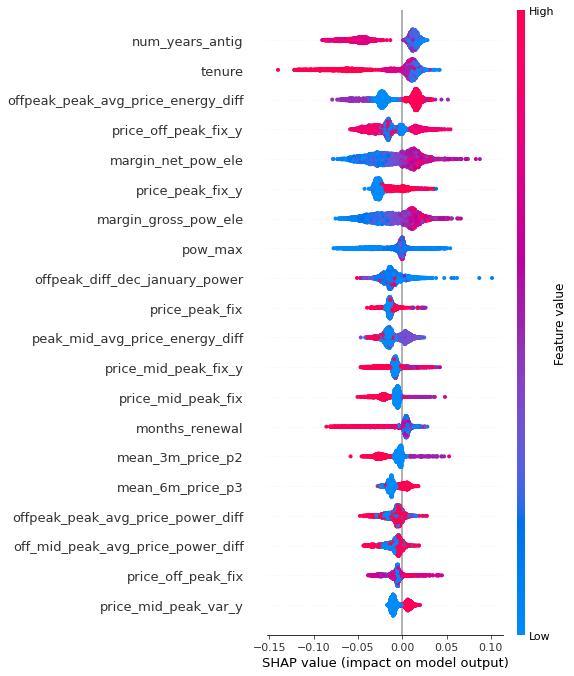

In [21]:
import shap
explainer = shap.TreeExplainer(model_rf_tunned)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)

* Top drivers of client churn are antiquity of the client, tenure, and difference off peak - peak in energy price
* If the client have low years of antiquity, probability of client will be churn is high
* New clients have higher probability to churn rather than old clients, because old client seems to be more loyal with the company
* The larger difference between off peak - peak prices in energy, it means when off-peak way too expensive than peak, probabilty of clients will be churn is also high
* also price off peak power and price peak power have high contribution as predictor, generaly, higher prices drive clients to churn
* For price sensitivity features, generally seeing there're some features that contribute as important features. We can say that prices sensitivity also became main driver of clients churn

In [23]:
client_churn_proba = model_rf_tunned.predict_proba(X_test)[:,1]
client_churn_proba

array([0.20556077, 0.16197215, 0.14869802, ..., 0.10810232, 0.06665663,
       0.13131688])

In [26]:
client_churn_proba.tolist()

[0.2055607713405156,
 0.16197215121370245,
 0.14869801758550028,
 0.20478738472941926,
 0.2633444182987235,
 0.4793144741107138,
 0.13009612970311418,
 0.21985178379494102,
 0.1319057016463344,
 0.2552616888559472,
 0.2362445690235653,
 0.2560059683274783,
 0.20433181856513255,
 0.23070321229451463,
 0.1091386478236664,
 0.21853872116280867,
 0.1324810760959829,
 0.07428617784927902,
 0.22046559453577946,
 0.3599034704399009,
 0.37298502856967725,
 0.205513607105313,
 0.21300329332304077,
 0.13998204741067075,
 0.16294718078380818,
 0.05702552300099223,
 0.161152808525683,
 0.27525866575826635,
 0.13620161950719298,
 0.15513101741063026,
 0.040209054809828434,
 0.10926079868102125,
 0.30928257710430457,
 0.11836540830949586,
 0.13340336509080575,
 0.1357808239964457,
 0.18884428815455523,
 0.2989448594590902,
 0.5835717125829504,
 0.2564985389005975,
 0.12956398862978452,
 0.259243208100216,
 0.3138905195639056,
 0.2268702800919648,
 0.18694858924831778,
 0.11031288459054651,
 0.112404

In [28]:
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,price_off_peak_var_x,price_peak_var_x,price_mid_peak_var_x,price_off_peak_fix_x,price_peak_fix_x,price_mid_peak_fix_x,price_off_peak_var_y,price_peak_var_y,price_mid_peak_var_y,price_off_peak_fix_y,price_peak_fix_y,price_mid_peak_fix_y,mean_6m_price_p1,mean_6m_price_p2,mean_6m_price_p3,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,offpeak_peak_avg_price_energy_diff,peak_mid_avg_price_energy_diff,off_mid_peak_avg_price_energy_diff,offpeak_peak_avg_price_power_diff,peak_mid_avg_price_power_diff,off_mid_peak_avg_price_power_diff,tenure,months_activ,months_to_end,months_modif_prod,months_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,43.648,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,0.123598,0.098104,0.061525,41.318559,20.364442,13.576296,41.442157,13.637821,20.462545,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,8.182687,12.311304,1,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925,3,30,5,2,6
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,13.800,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,0.147851,0.014247,0.000000,44.355820,0.000000,0.000000,44.503671,0.000000,0.014247,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0,-0.003767,0.177779,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375,7,76,7,76,4
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,13.856,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,0.168569,0.088535,0.000000,44.444710,0.000000,0.000000,44.613279,0.000000,0.088535,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.000000,0.088409,0,-0.004670,0.177779,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450,6,68,3,68,8
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,13.200,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,0.149330,0.000000,0.000000,44.444710,0.000000,0.000000,44.594040,0.000000,0.000000,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0,-0.004547,0.177779,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265,6,69,2,69,9
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,44.91,1,47.98,6,19.800,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555,40.850151,16.365283,24.539698,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,16.365274,24.539003,0,-0.006192,0.162916,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893,6,71,2,71,9


In [33]:
proba_predictions = model_rf_tunned.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

In [34]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [36]:
X_test['churn'] = y_pred_test_rf.tolist()
X_test['churn_probability'] = probabilities.tolist()
#X_test.to_csv('X_test_with_churn_proba.csv')

# Business impact of discount

The SME division head proposed that we give a 20% discount to high propensity to churn customers. We can assume to start that everyone who is offered a discount will accept it.

Our task is to calculate the forecast revenue for the set of customers:

1. When no discount is offered
2. And when a discount is offered based on a probability cutoff to decide who should receive the 20% discount

And hence to decide where the cut-off should be set in order to maximise revenue

## Calculate a baseline revenue estimate (no intervention)

Calculate a baseline estimate of the electricity revenue for every customer for the next twelve months based on the forecast consumption and forecast
price and actual churn outcome. Call this `basecase_revenue`.

- For customers who end up churning, we should reduce our forecast revenue calculation by 91.9% to account for the customers churn some time between January 2016 and the start of March 2016. (Not knowing when they churn, a reasonable assumption for the lost revenue is the average of 100%, corresponding to churn on 1 January 2016, and 83.9%, corresponding to churn at the end of February, or 59 days into a 365 day year). Call this new variable `basecase_revenue_after_churn`, ie `basecase_revenue_after_churn` = `basecase_revenue`*(1 -0.919 * `churn`)

In [37]:
test_df = X_test.copy()

In [41]:
# Electricity revenue for each customer consists of energy consumption (amount * price) and the meter rent
# (the power price may also play a role, but we will ignore it for now since we need to ask the client for more data)
# Note that we need to reverse the log10-transformation from the data cleaning step
test_df['basecase_revenue'] = (test_df['forecast_cons_12m']) * test_df['forecast_price_energy_off_peak'] + test_df['forecast_meter_rent_12m']

# Taking churn into account
test_df['basecase_revenue_after_churn'] = test_df['basecase_revenue'] * (1 - 0.919 * test_df['churn'])

In [47]:
test_df.sample(4)

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,price_off_peak_var_x,price_peak_var_x,price_mid_peak_var_x,price_off_peak_fix_x,price_peak_fix_x,price_mid_peak_fix_x,price_off_peak_var_y,price_peak_var_y,price_mid_peak_var_y,price_off_peak_fix_y,price_peak_fix_y,price_mid_peak_fix_y,mean_6m_price_p1,mean_6m_price_p2,mean_6m_price_p3,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,offpeak_peak_avg_price_energy_diff,peak_mid_avg_price_energy_diff,off_mid_peak_avg_price_energy_diff,offpeak_peak_avg_price_power_diff,peak_mid_avg_price_power_diff,off_mid_peak_avg_price_power_diff,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,churn,churn_probability,basecase_revenue,basecase_revenue_after_churn
1475,15381,0,89,1558.40,89,0.0,129.65,0.115174,0.098837,40.606701,0,8.50,11.61,11.61,2,189.66,4,15.030,0.122726,0.102185,0.072778,40.633851,24.380309,16.253540,0.119475,0.100975,0.074019,40.701733,24.421038,16.280693,40.821208,16.354712,24.522013,0.118175,0.100491,0.074516,40.728885,24.437330,16.291555,40.847060,16.366071,24.537821,-0.007801,0.162916,0.020541,0.029407,0.049948,16.253542,8.126769,24.380311,4,41,6,8,5,0,0.129857,309.137162,309.137162
3098,8483,0,1003,923.63,1003,0.0,17.41,0.161168,0.083911,44.311378,0,129.03,8.98,8.98,1,81.25,6,10.392,0.165697,0.083676,0.000000,44.311375,0.000000,0.000000,0.162538,0.082466,0.000000,44.355820,0.000000,0.000000,44.518358,0.000000,0.082466,0.163154,0.084408,0.000000,44.444710,0.000000,0.000000,44.607864,0.000000,0.084408,-0.006475,0.177779,0.082021,0.083676,0.165697,44.311375,0.000000,44.311375,7,75,8,5,3,0,0.093995,166.269600,166.269600
7,88359,0,6963,8636.60,6963,0.0,144.67,0.110314,0.093976,40.606701,0,657.86,23.36,23.36,1,713.82,6,40.000,0.119490,0.099175,0.070211,40.674580,24.404747,16.269833,0.114660,0.096311,0.069650,40.728885,24.437330,16.291555,40.843545,16.361205,24.533641,0.113300,0.095616,0.069641,40.728885,24.437330,16.291555,40.842185,16.361196,24.532946,-0.011520,0.162916,0.020314,0.028965,0.049279,16.269833,8.134914,24.404747,6,68,5,6,8,0,0.219852,1097.407892,1097.407892
1149,107869,0,35989,2089.93,540,0.0,167.76,0.100167,0.091892,58.995952,0,45.48,0.00,0.00,1,274.04,4,30.000,0.106532,0.095304,0.070860,59.055122,36.417707,8.350996,0.103318,0.093700,0.070990,59.173468,36.490689,8.367731,59.276786,8.438721,36.584389,0.102352,0.093181,0.070990,59.173468,36.490689,8.367731,59.275820,8.438721,36.583870,-0.007395,0.236694,0.011228,0.024444,0.035672,22.637415,28.066711,50.704126,4,42,5,42,6,1,0.557684,377.102018,30.545263


## Calculate the estimated benefits and costs of intervention

Now, pick a cut-off probability (eg 0.5) so that:

- Customers with a higher churn probability than the cut-off get a discount, and
- Customers below the churn-probability do not get a discount.

From this, calculate the revenue of the intervention scenario assuming:
- All customers who are offered a discount accept it
- Customers who do receive a discount are are assumed not to churn in the next twelve months (ie churn probability = 0), and therefore the retained
revenue is 0.8*`basecase_revenue` , being (1-`discount_fraction`)*`basecase_revenue`
- Customers who do not receive a discount are assumed to churn based on the observed dependent variable (ie, a 1 or 0 for whether they actually
churned or not).

Now, map out the revenue delta as a function of the cut-off probability in a graph. What cut-off probability approximately optimises the revenue outcome? Assume for these calculations that the customer does not consume more or less electricity because the price changes. In practice, we would expect that if the customer's cost goes down then their consumption might increase. We will see two counterbalancing effects at play:

- For true positives we will see revenue retention vs the no-discount scenario
- For false positives we will see reduced revenue from giving them a discount when they wouldn't in fact churn.

(False negatives represent an opportunity cost but not an actual cost difference between the two scenarios.)

The optimal cut-off point will balance the benefits from true positives against the costs of false positives. Our task is to approximately find the optimal cut-off point. We may need to make additional assumptions. If we feel the assumptions above aren't justified and that others are better then we should modify our assumptions.

In [48]:
def get_rev_delta(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2) -> float:
    """
    Get the delta of revenues for offering discount for all customers with predicted churn risk >= cutoff
    """
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    # Churn predicted => discount is given => customer stays for full year, independent of whether the prediction
    # (false positive, "free"/unnecessary discount given) or correct
    pred.loc[pred['churn_probability'] >= cutoff, 'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a separate column
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()

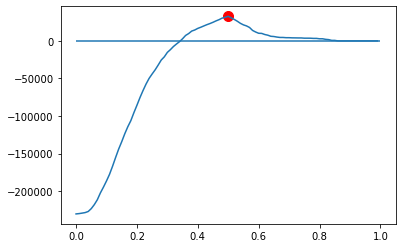

Maximum benefit at cutoff 0.5 with revenue delta of $32,833.74


In [49]:
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas = pd.Series({cutoff: get_rev_delta(test_df, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})

def plot_tradeoff(rev_deltas: pd.Series):
    # Plot the revenue deltas
    rev_deltas.plot()
    # Mark optimal point
    max_pred = rev_deltas.idxmax()
    plt.scatter(max_pred, rev_deltas.loc[max_pred], s=100, c='red')
    # Reference line for break-even
    plt.hlines(0, 0, 1)
    plt.show()
    print(f'Maximum benefit at cutoff {max_pred} with revenue delta of ${rev_deltas.loc[max_pred]:,.2f}')

plot_tradeoff(rev_deltas)

## How to Select Cut-Off?

Above, we decided who to offer the discount to based on a probability cut-off. Is this the optimal strategy?

- For instance, we might be offering discounts to customers who are not very profitable, thus worsening our overall margins substantially. For example, if offering a discount makes the customer unprofitable on a net margin basis then we might want to let them churn rather than save them.
- Even if we only consider revenue, this strategy might not be optimal from a revenue viewpoint. For instance, we can calculate the expected revenue impact of our strategy and prioritise customers for discounts that have a high expected revenue impact. (This means that the probability of churn might be high but they also might be valuable customers).

A general principle here is that we can afford to spend more on retaining high-value customers because the costs of losing them are higher. A very common mistake in business applications of churn is to focus on the churn probability whilst forgetting the value impact (to greater or lesser extents). We have seen many cases where our clients spend as much effort on retaining unprofitable customers as they do on retaining highly profitable customers.

In [51]:
def get_rev_delta_high_value(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2, min_rev: float=500):
    """
    Get the delta of revenues for offering discount for all customers with predicted churn risk >= cutoff and rev
    """
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    # Churn predicted => discount is given for high-value customers => customer stays for full year, independent
    # (false positive, "free"/unnecessary discount given) or correct
    pred.loc[(pred['churn_probability'] >= cutoff) & (pred['basecase_revenue'] > min_rev),
    'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a separate column
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()

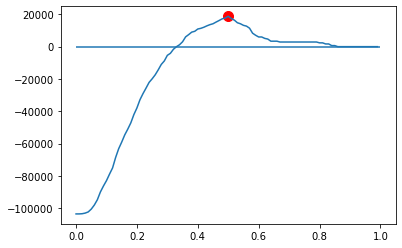

Maximum benefit at cutoff 0.5 with revenue delta of $18,821.76


In [52]:
## Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas_high_value = pd.Series({cutoff: get_rev_delta_high_value(test_df, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
plot_tradeoff(rev_deltas_high_value)

<b>Note:</b> 

- In this case, it doesn't make sense to prioritize large-revenue customers, since the overall revenue delta is much lower than when targeting everyone. However, this is only the case here since the intervention doesn't depend on the number of customers (simply adjusting prices). The interventions usually go beyond simply adjusting prices to prevent churn. 
- There may be the option of intensifying the customer relation, adding key account managers, or other interventions that do incur costs depending on how many customers are targeted. In that case, it may be benefitial to target only a subset of customers to save on these costs, even if the delta in the figure above is reduced.

## Using Forecast Rather Than Actual Churn

We may have noticed above that we used actual churn outcomes in calculating the financial impact. Actual churn outcomes are fine if we know them and are conducting a retrospective analysis of the effectiveness of a strategy. This example of analysis is commonly known as "backtesting", ie seeing how well a strategy would have performed historically.

Of course, one must be careful that any analysis is done using out-of-sample data. Conducting the analysis on the training data will lead to predictions that are too optimistic.

In practice, actual outcomes may not be available because they are in the future. An alternative is to optimise predicted/forecast revenue based on the probabilities which are an output from our churn model. In this case, we would replace the actual churn outcomes (`churn`) with the predicted probability of churn from our model. The results here are obviously model-dependent.

If our model probabilities are poorly calibrated then we can end up with quite poor results from this. Going down this path therefore usually requires the extra step of checking how well calibrated the model probabilities are, and potentially correcting for any miscalibration using Platt scaling, sigmoid calibration or isotonic regression.

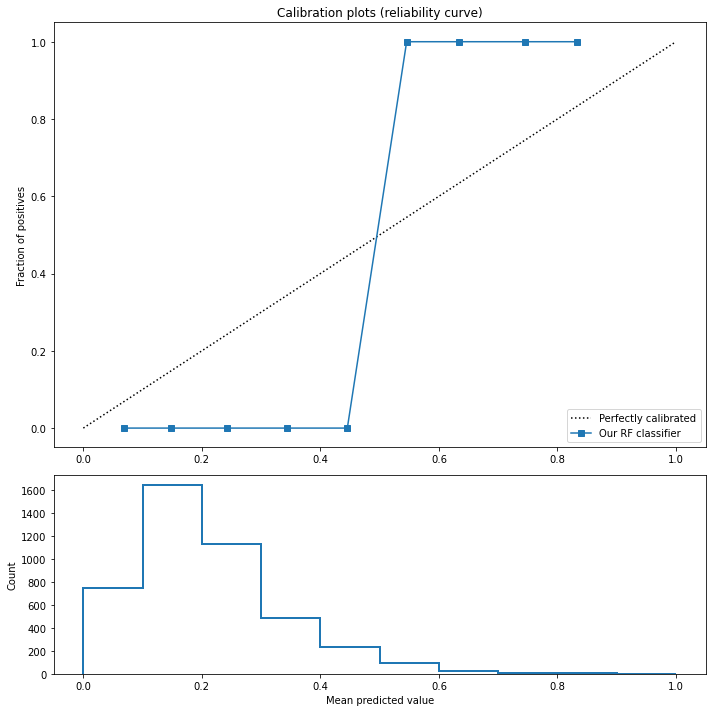

In [53]:
# Check our calibration
# (code copied from https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html)
from sklearn.calibration import calibration_curve

fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_true=test_df['churn'],
    y_prob=test_df['churn_probability'],
    n_bins=10
)
ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="Our RF classifier")
ax2.hist(test_df['churn_probability'], range=(0, 1), bins=10, histtype="step", lw=2)
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots (reliability curve)')
ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
plt.tight_layout()

This chart tells us a few things:

- The top calibration curve exhibits a sigmoid curve, which is typical for an under-confident classifier.
- The bottom chart shows us that the model is postively skewed toward predicting a probability, perhaps due to having such low confidence.

In [54]:
# Electricity evenue for each customer consists of energy consumption (amount * price) and the meter rent
# (the power price may also play a role, but we will ignore it for now since we need to ask the client for more d
# Note that we need to reverse the log10-transformation from the data cleaning step
test_df['basecase_revenue'] = (test_df['forecast_cons_12m']) * test_df['forecast_price_energy_off_peak'] + test_df['forecast_meter_rent_12m']
# Taking churn into account
test_df['basecase_revenue_after_churn'] = test_df['basecase_revenue'] * (1 - 0.919 * test_df['churn_probability'])

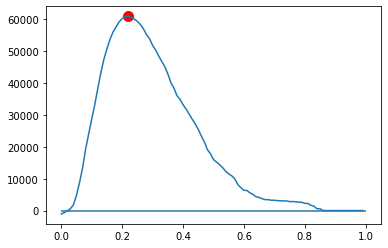

Maximum benefit at cutoff 0.22 with revenue delta of $60,949.26


In [55]:
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas = pd.Series({cutoff: get_rev_delta(test_df, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})
plot_tradeoff(rev_deltas)

## How to Select the Discount?

In the strategy suggested by the SME division head we offer a 20% discount to all customer targeted. However, this might not be optimal either. We assumed before that customers offered a discount will not churn. However, that may not be true in reality. The discount may not be large enough to prevent churn.

In fact, we can predict the churn probability for each customer as a function of price, margin and other factors. Therefore, we can try to find a strategy for each customer that optimises either their expected revenue or profit.

In order to go further, we'll need to try to:
- Change the level of discount offered overall
- Predict the response of customers to that discount (ie, the churn probability) based on how much that discount affects their prices, the revenue and margin.
    - Take care that we've applied the discount to all affected variables. To make this easier, we might want to retrain our model using a simpler set of variables where we know that we can factor the discount correctly into the predictors.
- Find the discount level that balances customer retention vs the cost of false positives.

In fact, this could be turned into a 2D optimisation problem:

- Objective: maximise net revenue (ie including the benefits of true positives and the cost of false positives)
- Decision variables:
    - Level of discount offered, and
    - Fraction of people who are offered a discount

An even more sophisticated strategy is to find the right level of discount for each customer that maximises their predicted revenue or margin.